In [94]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import geopandas as gpd
import datetime
import streamlit as st
from PIL import Image

# I - ouverture dataset + mise en dataframe + prise de connaissance

In [95]:
# Charger le fichier CSV avec le séparateur point-virgule
csv_file = "fr-esr-insersup 2024_09.csv"
df = pd.read_csv(csv_file, sep=";")
#option pour éviter l'avertissement et forcer la lecture
#df = pd.read_csv(csv_file, sep=";", low_memory=False)


C:\Users\Sybille\AppData\Local\Temp\ipykernel_26436\536364364.py:3: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, sep=";")


In [96]:
# Vérifier les types des colonnes 11 et 12
#print(df.dtypes[[11, 12]]) #ancienne version
print(df.iloc[:, [11, 12]].dtypes) #new version

Nombre de poursuivants    object
Nombre de sortants        object
dtype: object


In [97]:
# Afficher le nombre de valeurs NaN par colonne
nombre_nan_par_colonne = df.isna().sum()

# Afficher les résultats
print("Nombre de NaN par colonne :")
print(nombre_nan_par_colonne)


Nombre de NaN par colonne :
Diffusion des données                                     0
Région                                                   58
Académie                                                 58
Établissement                                             0
Établissement actuel                                      0
Type de diplôme                                           0
Domaine disciplinaire                                     0
Discipline                                                0
Secteur disciplinaire                                     0
Libellé du diplôme                                        0
Source de données                                         0
Nombre de poursuivants                                    0
Nombre de sortants                                        0
Année(s) d'obtention du diplôme prise(s) en compte        0
Date d'insertion en emploi                                0
Flag                                                  28897
Exception   

In [98]:
# Convertir en numérique mais ne pas modifier le DataFrame original, juste pour identifier les non-convertibles
# Servira au moment du traitement des conversions en numérique
non_convertibles_poursuivants = df['Nombre de poursuivants'][pd.to_numeric(df['Nombre de poursuivants'], errors='coerce').isna()]
non_convertibles_sortants = df['Nombre de sortants'][pd.to_numeric(df['Nombre de sortants'], errors='coerce').isna()]

# Afficher les valeurs uniques non convertibles
print("Valeurs uniques non convertibles dans 'Nombre de poursuivants' :")
print(non_convertibles_poursuivants.unique())

print("\nValeurs uniques non convertibles dans 'Nombre de sortants' :")
print(non_convertibles_sortants.unique())

# Calculer le nombre de valeurs convertibles (qui ne sont pas NaN après conversion)
nombre_total_poursuivants = df['Nombre de poursuivants'].size
nombre_total_sortants = df['Nombre de sortants'].size

# Nombre de valeurs convertibles
nombre_convertibles_poursuivants = nombre_total_poursuivants - non_convertibles_poursuivants.size
nombre_convertibles_sortants = nombre_total_sortants - non_convertibles_sortants.size

# Afficher le nombre de valeurs convertibles
print(f"\nNombre de valeurs convertibles dans 'Nombre de poursuivants' : {nombre_convertibles_poursuivants}")
print(f"Nombre de valeurs convertibles dans 'Nombre de sortants' : {nombre_convertibles_sortants}")

# Afficher le nombre de valeurs non convertibles
print(f"\nNombre de valeurs non convertibles dans 'Nombre de poursuivants' : {non_convertibles_poursuivants.size}")
print(f"Nombre de valeurs non convertibles dans 'Nombre de sortants' : {non_convertibles_sortants.size}")


Valeurs uniques non convertibles dans 'Nombre de poursuivants' :
['-']

Valeurs uniques non convertibles dans 'Nombre de sortants' :
['-']

Nombre de valeurs convertibles dans 'Nombre de poursuivants' : 83855
Nombre de valeurs convertibles dans 'Nombre de sortants' : 83855

Nombre de valeurs non convertibles dans 'Nombre de poursuivants' : 9016
Nombre de valeurs non convertibles dans 'Nombre de sortants' : 9016


In [99]:
#pour chacune des lignes où la cellule n'est pas convertible, dans les colonnes 11 et 12, afficher le nombre de valeurs uniques pour chaque autre colonne
# Identifier les lignes où 'Nombre de poursuivants' n'est pas convertible
non_convertibles_poursuivants = df[pd.to_numeric(df['Nombre de poursuivants'], errors='coerce').isna()]

# Identifier les lignes où 'Nombre de sortants' n'est pas convertible
non_convertibles_sortants = df[pd.to_numeric(df['Nombre de sortants'], errors='coerce').isna()]

# Afficher le nombre de valeurs uniques pour les autres colonnes dans les lignes où 'Nombre de poursuivants' n'est pas convertible
print("\nNombre de valeurs uniques pour les autres colonnes (lignes où 'Nombre de poursuivants' n'est pas convertible) :")
for col in df.columns:
    if col != 'Nombre de poursuivants':
        unique_count = non_convertibles_poursuivants[col].nunique()
        print(f"Colonne '{col}': {unique_count} valeurs uniques")

# Afficher le nombre de valeurs uniques pour les autres colonnes dans les lignes où 'Nombre de sortants' n'est pas convertible
print("\nNombre de valeurs uniques pour les autres colonnes (lignes où 'Nombre de sortants' n'est pas convertible) :")
for col in df.columns:
    if col != 'Nombre de sortants':
        unique_count = non_convertibles_sortants[col].nunique()
        print(f"Colonne '{col}': {unique_count} valeurs uniques")

# montre que pour source = ip, l'analyse se fait unique 18 et 30 mois après la diplomation


Nombre de valeurs uniques pour les autres colonnes (lignes où 'Nombre de poursuivants' n'est pas convertible) :
Colonne 'Diffusion des données': 1 valeurs uniques
Colonne 'Région': 16 valeurs uniques
Colonne 'Académie': 28 valeurs uniques
Colonne 'Établissement': 67 valeurs uniques
Colonne 'Établissement actuel': 67 valeurs uniques
Colonne 'Type de diplôme': 3 valeurs uniques
Colonne 'Domaine disciplinaire': 5 valeurs uniques
Colonne 'Discipline': 14 valeurs uniques
Colonne 'Secteur disciplinaire': 47 valeurs uniques
Colonne 'Libellé du diplôme': 442 valeurs uniques
Colonne 'Source de données': 1 valeurs uniques
Colonne 'Nombre de sortants': 1 valeurs uniques
Colonne 'Année(s) d'obtention du diplôme prise(s) en compte': 2 valeurs uniques
Colonne 'Date d'insertion en emploi': 2 valeurs uniques
Colonne 'Flag': 2 valeurs uniques
Colonne 'Exception': 2 valeurs uniques
Colonne 'Taux d'emploi salarié en France': 1 valeurs uniques
Colonne '% d'emplois stables parmi les salarié en France': 0 

In [100]:
# Afficher un aperçu des premières lignes du DataFrame
print(df.head(2))


  Diffusion des données     Région    Académie             Établissement  \
0               2024_S1  Grand Est  Strasbourg  Université de Strasbourg   
1               2024_S1  Grand Est  Strasbourg  Université de Strasbourg   

       Établissement actuel Type de diplôme          Domaine disciplinaire  \
0  Université de Strasbourg      Master LMD  Sciences, technologies, santé   
1  Université de Strasbourg      Master LMD  Sciences humaines et sociales   

                                        Discipline  \
0  Sciences de la vie, de la terre et de l'univers   
1                    Sciences humaines et sociales   

                 Secteur disciplinaire       Libellé du diplôme  ...  \
0  Sciences de la vie, biologie, santé           SANTE PUBLIQUE  ...   
1              Sciences de l'éducation  SCIENCES DE L'EDUCATION  ...   

  Code de l'académie Identifiant interne de l'établissement  \
0                A15                                  4k25D   
1                A15          

In [101]:
#analyse du fichier 
print(df.shape)

(92871, 32)


In [102]:
# Afficher le nombre de valeurs non nulles par colonne
valeurs_non_nulles = df.count()
print(valeurs_non_nulles)

Diffusion des données                                 92871
Région                                                92813
Académie                                              92813
Établissement                                         92871
Établissement actuel                                  92871
Type de diplôme                                       92871
Domaine disciplinaire                                 92871
Discipline                                            92871
Secteur disciplinaire                                 92871
Libellé du diplôme                                    92871
Source de données                                     92871
Nombre de poursuivants                                92871
Nombre de sortants                                    92871
Année(s) d'obtention du diplôme prise(s) en compte    92871
Date d'insertion en emploi                            92871
Flag                                                  63974
Exception                               

In [103]:
df.describe()

,Mois après la diplomation
count,92871.000000
mean,17.329457
std,8.309336
min,6.000000
25%,12.000000
50%,18.000000
75%,24.000000
max,30.000000


In [104]:
df.columns

Index(['Diffusion des données', 'Région', 'Académie', 'Établissement',
       'Établissement actuel', 'Type de diplôme', 'Domaine disciplinaire',
       'Discipline', 'Secteur disciplinaire', 'Libellé du diplôme',
       'Source de données', 'Nombre de poursuivants', 'Nombre de sortants',
       'Année(s) d'obtention du diplôme prise(s) en compte',
       'Date d'insertion en emploi', 'Flag', 'Exception',
       'Taux d'emploi salarié en France',
       '% d'emplois stables parmi les salarié en France', 'Taux d'insertion',
       'Taux d'emploi', 'Code de la région', 'Code de l'académie',
       'Identifiant interne de l'établissement',
       'Identifiant interne de l'établissement actuel',
       'Code UAI de l'établissement', 'type_diplome',
       'Code du domaine disciplinaire', 'Code de la discipline',
       'Code du secteur disciplinaire', 'Code du diplôme SISE',
       'Mois après la diplomation'],
      dtype='object')

In [105]:
# Afficher le nombre de valeurs NaN par colonne
nombre_nan_par_colonne = df.isna().sum()

# Afficher les résultats
print("Nombre de NaN par colonne :")
print(nombre_nan_par_colonne)


Nombre de NaN par colonne :
Diffusion des données                                     0
Région                                                   58
Académie                                                 58
Établissement                                             0
Établissement actuel                                      0
Type de diplôme                                           0
Domaine disciplinaire                                     0
Discipline                                                0
Secteur disciplinaire                                     0
Libellé du diplôme                                        0
Source de données                                         0
Nombre de poursuivants                                    0
Nombre de sortants                                        0
Année(s) d'obtention du diplôme prise(s) en compte        0
Date d'insertion en emploi                                0
Flag                                                  28897
Exception   

In [106]:
# Liste des colonnes à transformer en numérique et arrondi au 100 ème sauf col 11 et 12 en intcomme vu ci-dessus
#le faire ici pour éviter l'ajout de centièmes à la colonne Mois après la diplomation
# Liste des colonnes à transformer en numérique
colonnes_a_convertir = [
    'Nombre de poursuivants',
    'Nombre de sortants',
    'Taux d\'emploi salarié en France',
    '% d\'emplois stables parmi les salarié en France',
    'Taux d\'insertion',
    'Taux d\'emploi',
]

# Transformer ces colonnes en numérique
for col in colonnes_a_convertir:
    if col in df.columns:
        if 'Nombre' in col:  # Si la colonne commence par 'Nombre', convertir en entier
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
        else:  # Sinon, convertir en float et arrondir à 2 décimales
            df[col] = pd.to_numeric(df[col], errors='coerce').round(2)
          # si une valeur non convertissable en nombre, elle sera remplacée par NaN, plutôt que de lever une erreur. Fait pour les valeurs telles que nd ou -
          

# Globalement sélectionner toutes les colonnes de type numérique puis les afficher 
colonnes_numeriques = df.select_dtypes(include=[np.number]).columns
print(colonnes_numeriques)

Index(['Nombre de poursuivants', 'Nombre de sortants',
       'Taux d'emploi salarié en France',
       '% d'emplois stables parmi les salarié en France', 'Taux d'insertion',
       'Taux d'emploi', 'Mois après la diplomation'],
      dtype='object')


In [107]:
# Afficher le nombre de valeurs NaN par colonne
nombre_nan_par_colonne = df.isna().sum()

# Afficher les résultats
print("Nombre de NaN par colonne :")
print(nombre_nan_par_colonne)


Nombre de NaN par colonne :
Diffusion des données                                     0
Région                                                   58
Académie                                                 58
Établissement                                             0
Établissement actuel                                      0
Type de diplôme                                           0
Domaine disciplinaire                                     0
Discipline                                                0
Secteur disciplinaire                                     0
Libellé du diplôme                                        0
Source de données                                         0
Nombre de poursuivants                                    0
Nombre de sortants                                        0
Année(s) d'obtention du diplôme prise(s) en compte        0
Date d'insertion en emploi                                0
Flag                                                  28897
Exception   

In [108]:
# Sélectionner les colonnes non numériques (ni int, ni float) et non bool et les convertir en string
colonnes_a_convertir = df.select_dtypes(exclude=['number', 'bool']).columns

# Convertir ces colonnes en chaînes de caractères (string)
df[colonnes_a_convertir] = df[colonnes_a_convertir].astype(str)

# Remplacer les valeurs vides (chaînes vides ou espaces) par NaN dans les colonnes string
df[colonnes_a_convertir] = df[colonnes_a_convertir].replace(r'^\s*$', np.nan, regex=True) #remplace à la fois les chaînes vides ('') et celles ne contenant que des espaces (' ', ' ', etc.) par NaN.

# Afficher les types de colonnes pour vérifier les changements
print("Types de colonnes après conversion en string :")
print(df[colonnes_a_convertir].dtypes)

# Vérifier les modifications : afficher le nombre de valeurs NaN après remplacement
print("\nNombre de valeurs NaN après remplacement des valeurs vides :")
print(df[colonnes_a_convertir].isna().sum())


Types de colonnes après conversion en string :
Diffusion des données                                 object
Région                                                object
Académie                                              object
Établissement                                         object
Établissement actuel                                  object
Type de diplôme                                       object
Domaine disciplinaire                                 object
Discipline                                            object
Secteur disciplinaire                                 object
Libellé du diplôme                                    object
Source de données                                     object
Année(s) d'obtention du diplôme prise(s) en compte    object
Date d'insertion en emploi                            object
Flag                                                  object
Exception                                             object
Code de la région                     

In [109]:

#vérifier avec l'affichage des valeurs uniques de la première colonne
# Afficher les valeurs uniques de la colonne 'Région'
if 'Région' in df.columns:
    print("\nValeurs uniques de la colonne 'Région' :")
    print(df['Région'].unique())
else:
    print("\nLa colonne 'Région' n'existe pas dans le DataFrame.")


Valeurs uniques de la colonne 'Région' :
['Grand Est' 'Occitanie' 'Centre-Val de Loire' 'Île-de-France' 'nan'
 "Provence-Alpes-Côte d'Azur" 'Bourgogne-Franche-Comté' 'Mayotte'
 'Pays de la Loire' 'Bretagne' 'Auvergne-Rhône-Alpes' 'Hauts-de-France'
 'Nouvelle-Aquitaine' 'Corse' 'Normandie' 'Guyane' 'Guadeloupe'
 'La Réunion' "Collectivités d'outre-mer"]


## II - RECHERCHE CARACTERISTIQUES : colonnes, lignes et cellules  

In [110]:
# Identification des types colonnes non nulles et de leur type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92871 entries, 0 to 92870
Data columns (total 32 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Diffusion des données                               92871 non-null  object 
 1   Région                                              92871 non-null  object 
 2   Académie                                            92871 non-null  object 
 3   Établissement                                       92871 non-null  object 
 4   Établissement actuel                                92871 non-null  object 
 5   Type de diplôme                                     92871 non-null  object 
 6   Domaine disciplinaire                               92871 non-null  object 
 7   Discipline                                          92871 non-null  object 
 8   Secteur disciplinaire                               92871 non-null  object 


In [111]:
df.shape

(92871, 32)

In [112]:
# Identifier les colonnes avec une seule valeur unique
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]

# Supprimer les colonnes avec une seule valeur unique
df = df.drop(columns=["Diffusion des données"])

# Afficher les colonnes supprimées et le DataFrame nettoyé
print(f"Colonne(s) supprimée(s) : {cols_to_drop}")

Colonne(s) supprimée(s) : ['Diffusion des données']


In [113]:
#supprimer les lignes où Taux d'emploi salarié en France, % d'emplois stables parmi les salarié en France, Taux d'insertion et Taux d'emploi sont tous vides en même temps

# Liste des colonnes à vérifier
colonnes_a_verifier = [
    "Taux d'emploi salarié en France",
    "% d'emplois stables parmi les salarié en France",
    "Taux d'insertion",
    "Taux d'emploi"
]

# Nombre de lignes avant suppression
nb_lignes_avant = df.shape[0]
# Supprimer les lignes où toutes ces colonnes sont vides en même temps
df = df.dropna(subset=colonnes_a_verifier, how='all')
nb_lignes_apres = df.shape[0]
# Calculer le nombre de lignes supprimées
nb_lignes_supprimees = nb_lignes_avant - nb_lignes_apres

# Afficher le nombre de lignes supprimées
print(f"Nombre de lignes supprimées : {nb_lignes_supprimees}")

Nombre de lignes supprimées : 41466


In [114]:
#CAS PARTICULIER des totaux nuls ou vides  
# Liste des colonnes à vérifier
colonnes_a_verifier = [
    "Taux d'emploi salarié en France",
    "% d'emplois stables parmi les salarié en France",
    "Taux d'insertion",
    "Taux d'emploi"
]

# Nombre de lignes avant suppression
nb_lignes_avant = df.shape[0]

# Condition pour identifier les lignes à supprimer
condition_zeros_vides = (
    (df[colonnes_a_verifier] == 0).any(axis=1) &  # Au moins une colonne est égale à 0
    (df[colonnes_a_verifier].isna() | (df[colonnes_a_verifier] == 0)).all(axis=1)  # Les autres colonnes sont vides ou 0
)

# Supprimer les lignes correspondant à cette condition
df = df[~condition_zeros_vides]

# Nombre de lignes après suppression
nb_lignes_apres = df.shape[0]

# Calculer le nombre de lignes supprimées
nb_lignes_supprimees = nb_lignes_avant - nb_lignes_apres

# Afficher le nombre de lignes supprimées
print(f"Nombre de lignes supprimées : {nb_lignes_supprimees}")


Nombre de lignes supprimées : 53


In [115]:
#Vérification : 
# Initialisation d'un dictionnaire pour stocker les résultats
resultats_tirets_nd = {}

# Boucle pour vérifier chaque colonne
for col in colonnes_a_verifier:
    if col in df.columns:
        # Convertir la colonne en chaînes de caractères pour permettre la comparaison
        col_str = df[col].astype(str)
        
        # Compter les occurrences de tirets et de "nd"
        nombre_tirets= (col_str == '-').sum()
        nombre_nd = (col_str.str.lower() == 'nd').sum()
        
        # Stocker les résultats dans le dictionnaire
        resultats_tirets_nd[col] = {
            "Nombre de tirets": nombre_tirets,
            "Nombre de nd": nombre_nd
        }

# Afficher les résultats
for col, valeurs in resultats_tirets_nd.items():
    print(f"Colonne: {col}")
    print(f"  Nombre de tirets: {valeurs['Nombre de tirets']}")
    print(f"  Nombre de nd: {valeurs['Nombre de nd']}")


Colonne: Taux d'emploi salarié en France
  Nombre de tirets: 0
  Nombre de nd: 0
Colonne: % d'emplois stables parmi les salarié en France
  Nombre de tirets: 0
  Nombre de nd: 0
Colonne: Taux d'insertion
  Nombre de tirets: 0
  Nombre de nd: 0
Colonne: Taux d'emploi
  Nombre de tirets: 0
  Nombre de nd: 0


In [116]:
df.shape

(51352, 31)

In [117]:
# Afficher le nombre de valeurs NaN par colonne
nombre_nan_par_colonne = df.isna().sum()

# Afficher les résultats
print("Nombre de NaN par colonne :")
print(nombre_nan_par_colonne)


Nombre de NaN par colonne :
Région                                                    0
Académie                                                  0
Établissement                                             0
Établissement actuel                                      0
Type de diplôme                                           0
Domaine disciplinaire                                     0
Discipline                                                0
Secteur disciplinaire                                     0
Libellé du diplôme                                        0
Source de données                                         0
Nombre de poursuivants                                    0
Nombre de sortants                                        0
Année(s) d'obtention du diplôme prise(s) en compte        0
Date d'insertion en emploi                                0
Flag                                                      0
Exception                                                 0
Taux d'emplo

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51352 entries, 1 to 92869
Data columns (total 31 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Région                                              51352 non-null  object 
 1   Académie                                            51352 non-null  object 
 2   Établissement                                       51352 non-null  object 
 3   Établissement actuel                                51352 non-null  object 
 4   Type de diplôme                                     51352 non-null  object 
 5   Domaine disciplinaire                               51352 non-null  object 
 6   Discipline                                          51352 non-null  object 
 7   Secteur disciplinaire                               51352 non-null  object 
 8   Libellé du diplôme                                  51352 non-null  object 
 9   

In [119]:
# Suppression des espaces autour des valeurs de type string
#df['Type de diplôme'] = df['Type de diplôme'].str.strip()
#df['Source de données'] = df['Source de données'].str.strip()
#df["Année(s) d'obtention du diplôme prise(s) en compte"] = df["Année(s) d'obtention du diplôme prise(s) en compte"].str.strip()

# Conditions communes pour les deux cas
common_conditions = (
    (df['Mois après la diplomation'] == 18) &  # Mois après la diplomation = 18
    (df["Année(s) d'obtention du diplôme prise(s) en compte"] == "2020") &  # Année = 2020
    (df['Type de diplôme'] == 'Licence professionnelle') &  # Type de diplôme = licence_pro
    (df['Libellé du diplôme'] == 'Toute licence professionnelle') &  
    (df['Source de données'] == 'insersup')  # Source de données = insersup
)

# Filtrer les données où la région est vide
resultat_region_vide = df.loc[
    common_conditions & (df['Région'].isna() | (df['Région'].str.strip() == '')| (df['Région'].str.strip() == 'nan')),  # Région vide ou chaîne vide
    'Nombre de sortants'
]

# Filtrer les données où la région n'est pas vide : nan ou ''
resultat_region_non_vide = df.loc[
    common_conditions & (df['Région'].notna() &(df['Région'].str.strip() != '') & (df['Région'].str.strip() != 'nan')),  # Région non vide et non NaN
    'Nombre de sortants'
]

resultat_total = df.loc[common_conditions , 'Nombre de sortants'] # sans tri région
# Afficher les résultats
print("Valeur de 'Nombre de sortants' pour Région vide :")
print(resultat_region_vide)

# Afficher la première occurrence où Région est vide
print("\nPremière occurrence où Région est vide :")
premiere_occurrence_vide = resultat_region_vide.head(1)
print(premiere_occurrence_vide)

# Calculer et afficher la somme des valeurs pour les régions non vides
somme_region_non_vide = resultat_region_non_vide.sum()
somme_region_vide = resultat_region_vide.sum()
somme_total = resultat_total.sum()

print(f"\nSomme des 'Nombre de sortants' pour Région non vide : {somme_region_non_vide}")
print(f"\nSomme des 'Nombre de sortants' pour Région vide : {somme_region_vide}")
print(f"\nSomme des 'Nombre de sortants' pour toutes régions ou no : {somme_total}")
# Comparer les résultats pour les régions vides et non vides
if somme_region_vide == somme_region_non_vide:
    print("\nL'absence de région dans le dataset n'affecte pas la cohérence des données, les totaux sont les mêmes.")
else:
    print("\nL'absence de région dans le dataset indique que certaines données ne sont pas exploitables ou sont différentes.")


Valeur de 'Nombre de sortants' pour Région vide :
400    24327
Name: Nombre de sortants, dtype: int64

Première occurrence où Région est vide :
400    24327
Name: Nombre de sortants, dtype: int64

Somme des 'Nombre de sortants' pour Région non vide : 24375

Somme des 'Nombre de sortants' pour Région vide : 24327

Somme des 'Nombre de sortants' pour toutes régions ou no : 48702

L'absence de région dans le dataset indique que certaines données ne sont pas exploitables ou sont différentes.


In [120]:
# Filtrer les données où Région est vide (chaîne vide ou espaces) ou NaN
resultat_region_vide = df.loc[
    common_conditions & (df['Région'].isna() | (df['Région'].str.strip() == '') | (df['Région'].str.strip() == 'nan'))
]

# Afficher les résultats
print("Lignes où la colonne 'Région' est vide, contient 'na' ou est NaN :")
print(resultat_region_vide)


Lignes où la colonne 'Région' est vide, contient 'na' ou est NaN :
    Région Académie Établissement Établissement actuel  \
400    nan      nan      National             National   

             Type de diplôme         Domaine disciplinaire  \
400  Licence professionnelle  Tous domaines disciplinaires   

             Discipline         Secteur disciplinaire  \
400  Toutes disciplines  Tous secteurs disciplinaires   

                Libellé du diplôme Source de données  ...  Code de l'académie  \
400  Toute licence professionnelle          insersup  ...                 nan   

     Identifiant interne de l'établissement  \
400                                    UNIV   

    Identifiant interne de l'établissement actuel Code UAI de l'établissement  \
400                                          UNIV                         all   

    type_diplome Code du domaine disciplinaire  Code de la discipline  \
400  licence_pro                           all                    all   

     Cod

In [121]:
#Identifier toutes les valeurs nulles ou nan du dataframe
null_mask = df.isna() 

# Filtrer les lignes contenant des valeurs nulles, NaN 
df_with_nulls = df[null_mask.any(axis=1)]

# Afficher les lignes contenant des valeurs nulles, NaN 
print(df_with_nulls)

# chaque ligne du DF est bien concernée

                           Région    Académie             Établissement  \
1                       Grand Est  Strasbourg  Université de Strasbourg   
2                       Grand Est  Strasbourg  Université de Strasbourg   
3                       Grand Est  Strasbourg  Université de Strasbourg   
4                       Grand Est  Strasbourg  Université de Strasbourg   
5                       Grand Est  Strasbourg  Université de Strasbourg   
...                           ...         ...                       ...   
92855  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   
92857  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   
92858  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   
92859  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   
92869  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   

           Établissement actuel          Type de diplôme  \
1      Université de Strasbourg        

In [122]:
df.dtypes

Région                                                 object
Académie                                               object
Établissement                                          object
Établissement actuel                                   object
Type de diplôme                                        object
Domaine disciplinaire                                  object
Discipline                                             object
Secteur disciplinaire                                  object
Libellé du diplôme                                     object
Source de données                                      object
Nombre de poursuivants                                  int64
Nombre de sortants                                      int64
Année(s) d'obtention du diplôme prise(s) en compte     object
Date d'insertion en emploi                             object
Flag                                                   object
Exception                                              object
Taux d'e

In [123]:
#gestion des valeurs nd ou - 
# Liste pour stocker les colonnes qui contiennent 'nd' ou '-'
colonnes_avec_valeurs_speciales = []

# Parcourir les colonnes du DataFrame qui sont de type string
for col in df.select_dtypes(include=['string']).columns:
    if df[col].isin(['nd', '-']).any():
        # Ajouter la colonne à la liste si elle contient 'nd' ou '-'
        colonnes_avec_valeurs_speciales.append(col)

# Afficher les colonnes qui contiennent 'nd' ou '-'
print("Colonnes contenant 'nd' ou '-' :")
print(colonnes_avec_valeurs_speciales)


Colonnes contenant 'nd' ou '-' :
[]


In [124]:
# Identifier toutes les colonnes contenant des cellules avec 'nd' ou '-'
mask_nd_or_dash = df.apply(lambda col: col.map(lambda x: x == "nd" or x == "-"))
cols_with_nd_or_dash = mask_nd_or_dash.any(axis=0)

# Afficher les colonnes qui ont au moins une valeur 'nd' ou '-'
print("\nColonnes avec au moins une valeur 'nd' ou '-':")
print(cols_with_nd_or_dash[cols_with_nd_or_dash].index.tolist())
#résultat montre que les nd étaient bien que dans les colonnes converties en float. A vérifier ci-dessous


Colonnes avec au moins une valeur 'nd' ou '-':
[]


In [125]:
# Afficher le nombre de valeurs NaN par colonne
nombre_nan_par_colonne = df.isna().sum()

# Afficher les résultats
print("Nombre de NaN par colonne :")
print(nombre_nan_par_colonne)


Nombre de NaN par colonne :
Région                                                    0
Académie                                                  0
Établissement                                             0
Établissement actuel                                      0
Type de diplôme                                           0
Domaine disciplinaire                                     0
Discipline                                                0
Secteur disciplinaire                                     0
Libellé du diplôme                                        0
Source de données                                         0
Nombre de poursuivants                                    0
Nombre de sortants                                        0
Année(s) d'obtention du diplôme prise(s) en compte        0
Date d'insertion en emploi                                0
Flag                                                      0
Exception                                                 0
Taux d'emplo

In [126]:
#identifier toutes les lignes de la colonne Année(s) d'obtention du diplôme prise(s) en compte qui sont nulles 

df_no_millesime = df[df["Année(s) d'obtention du diplôme prise(s) en compte"].isna()]

# Afficher le DataFrame résultant
print(df_no_millesime)

Empty DataFrame
Columns: [Région, Académie, Établissement, Établissement actuel, Type de diplôme, Domaine disciplinaire, Discipline, Secteur disciplinaire, Libellé du diplôme, Source de données, Nombre de poursuivants, Nombre de sortants, Année(s) d'obtention du diplôme prise(s) en compte, Date d'insertion en emploi, Flag, Exception, Taux d'emploi salarié en France, % d'emplois stables parmi les salarié en France, Taux d'insertion, Taux d'emploi, Code de la région, Code de l'académie, Identifiant interne de l'établissement, Identifiant interne de l'établissement actuel, Code UAI de l'établissement, type_diplome, Code du domaine disciplinaire, Code de la discipline, Code du secteur disciplinaire, Code du diplôme SISE, Mois après la diplomation]
Index: []

[0 rows x 31 columns]


In [127]:
df.describe

<bound method NDFrame.describe of                            Région    Académie             Établissement  \
1                       Grand Est  Strasbourg  Université de Strasbourg   
2                       Grand Est  Strasbourg  Université de Strasbourg   
3                       Grand Est  Strasbourg  Université de Strasbourg   
4                       Grand Est  Strasbourg  Université de Strasbourg   
5                       Grand Est  Strasbourg  Université de Strasbourg   
...                           ...         ...                       ...   
92855  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   
92857  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   
92858  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   
92859  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   
92869  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   

           Établissement actuel          Type de diplôme  \
1    

In [128]:
df["Mois après la diplomation"].value_counts()

Mois après la diplomation
18    12849
6     11067
12    11059
30     9096
24     7281
Name: count, dtype: int64

In [129]:
df["Taux d'emploi salarié en France"].value_counts()

Taux d'emploi salarié en France
75.0     953
50.0     836
80.0     810
66.7     790
100.0    570
        ... 
5.8        1
5.9        1
18.9       1
8.5        1
33.7       1
Name: count, Length: 844, dtype: int64

In [130]:
df["Taux d'emploi"].value_counts()

Taux d'emploi
100.00    374
90.00      14
85.71      12
95.65       9
90.91       9
         ... 
92.93       1
78.20       1
83.20       1
95.42       1
74.31       1
Name: count, Length: 1734, dtype: int64

In [131]:
df["Taux d'insertion"].value_counts()

Taux d'insertion
100.00    739
95.24      16
90.91      14
90.00      13
95.01      10
         ... 
85.10       1
91.26       1
61.91       1
85.99       1
77.06       1
Name: count, Length: 1458, dtype: int64

In [132]:
df["Année(s) d'obtention du diplôme prise(s) en compte"].value_counts()

Année(s) d'obtention du diplôme prise(s) en compte
2020         11616
2021         10701
2019,2020     9503
2020,2021     8188
2022          6510
2021,2022     4834
Name: count, dtype: int64

In [133]:
df.head(10).T

,1,2,3,4,5,6,7,8,9,10
Région,Grand Est,Grand Est,Grand Est,Grand Est,Grand Est,Grand Est,Grand Est,Grand Est,Grand Est,Grand Est
Académie,Strasbourg,Strasbourg,Strasbourg,Strasbourg,Strasbourg,Strasbourg,Strasbourg,Strasbourg,Strasbourg,Strasbourg
Établissement,Université de Strasbourg,Université de Strasbourg,Université de Strasbourg,Université de Strasbourg,Université de Strasbourg,Université de Strasbourg,Université de Strasbourg,Université de Strasbourg,Université de Strasbourg,Université de Strasbourg
Établissement actuel,Université de Strasbourg,Université de Strasbourg,Université de Strasbourg,Université de Strasbourg,Université de Strasbourg,Université de Strasbourg,Université de Strasbourg,Université de Strasbourg,Université de Strasbourg,Université de Strasbourg
Type de diplôme,Master LMD,Master LMD,Master LMD,Master LMD,Master LMD,Master LMD,Master LMD,Master LMD,Master LMD,Master LMD
Domaine disciplinaire,Sciences humaines et sociales,"Sciences, technologies, santé","Sciences, technologies, santé","Sciences, technologies, santé","Sciences, technologies, santé","Sciences, technologies, santé","Sciences, technologies, santé",Sciences humaines et sociales,Sciences humaines et sociales,"Lettres, langues et arts"
Discipline,Sciences humaines et sociales,"Sciences de la vie, de la terre et de l'univers","Sciences de la vie, de la terre et de l'univers",Sciences fondamentales et applications,Sciences fondamentales et applications,Sciences fondamentales et applications,STAPS,Sciences humaines et sociales,Sciences humaines et sociales,Langues
Secteur disciplinaire,Sciences de l'éducation,"Sciences de l'univers, de la Terre, de l'espac...","Sciences de la vie, biologie, santé","Mécanique, génie mécanique, ingénierie mécanique","Mécanique, génie mécanique, ingénierie mécanique","Mécanique, génie mécanique, ingénierie mécanique",STAPS,"Sociologie, démographie","Sociologie, démographie",Langues étrangères appliquées
Libellé du diplôme,SCIENCES DE L'EDUCATION,"SCIENCES DE LA TERRE ET DES PLANETES, ENVIRONN...",SCIENCES DU MEDICAMENT ET DES PRODUITS DE SANTE,SCIENCES ET GENIE DES MATERIAUX,SCIENCES ET GENIE DES MATERIAUX,SCIENCES ET GENIE DES MATERIAUX,SCIENCES ET TECHNIQUES DES ACTIVITES PHYSIQUES...,SOCIOLOGIE,SOCIOLOGIE,TRADUCTION ET INTERPRETATION
Source de données,insersup,insersup,insersup,insersup,insersup,insersup,insersup,insersup,insersup,insersup


In [134]:
#identification et gestion des colonnes dupliquées

# Transposer le DataFrame pour travailler avec les colonnes comme des lignes
df_T = df.T

# Identifier les colonnes dupliquées
duplicate_columns = df_T.duplicated()

# Afficher les colonnes dupliquées
print("Colonnes dupliquées :")
print(duplicate_columns)

# Compter le nombre de colonnes dupliquées
num_duplicates = duplicate_columns.sum()
print(f"Nombre de colonnes dupliquées : {num_duplicates}")

#pas de colonne à supprimer

Colonnes dupliquées :
Région                                                False
Académie                                              False
Établissement                                         False
Établissement actuel                                  False
Type de diplôme                                       False
Domaine disciplinaire                                 False
Discipline                                            False
Secteur disciplinaire                                 False
Libellé du diplôme                                    False
Source de données                                     False
Nombre de poursuivants                                False
Nombre de sortants                                    False
Année(s) d'obtention du diplôme prise(s) en compte    False
Date d'insertion en emploi                            False
Flag                                                  False
Exception                                             False
Taux d'emploi sala

In [135]:
##gestion des colonnes redondantes et quasi dupliquées sur la base du head(ci-dessus)

# Comparaison des deux colonnes
compared = df["Identifiant interne de l'établissement"] != df["Identifiant interne de l'établissement actuel"]

# Créer un DataFrame des résultats de la comparaison
compared_df = pd.DataFrame(compared, columns=['Différences'])

# Ajouter les colonnes d'origine au DataFrame des différences pour contexte
compared_df["Identifiant interne de l'établissement"] = df["Identifiant interne de l'établissement"]
compared_df["Identifiant interne de l'établissement actuel"] = df["Identifiant interne de l'établissement actuel"]

# Filtrer les lignes où il y a des différences (True)
differences_df = compared_df[compared_df['Différences']]

# Transposer le résultat pour voir tous les True renvoyés
transposed_differences = differences_df.T

# Afficher les différences transposées
print(transposed_differences)



                                               31     32     33     36     \
Différences                                     True   True   True   True   
Identifiant interne de l'établissement         542Id  542Id  542Id  542Id   
Identifiant interne de l'établissement actuel  gap5Q  gap5Q  gap5Q  gap5Q   

                                               37     38     39     44     \
Différences                                     True   True   True   True   
Identifiant interne de l'établissement         542Id  542Id  542Id  542Id   
Identifiant interne de l'établissement actuel  gap5Q  gap5Q  gap5Q  gap5Q   

                                               46     49     ...  92302  \
Différences                                     True   True  ...   True   
Identifiant interne de l'établissement         542Id  542Id  ...  542Id   
Identifiant interne de l'établissement actuel  gap5Q  gap5Q  ...  gap5Q   

                                               92509  92510  92527  92528  \
Diff

In [136]:
df.tail()

,Région,Académie,Établissement,Établissement actuel,Type de diplôme,Domaine disciplinaire,Discipline,Secteur disciplinaire,Libellé du diplôme,Source de données,...,Code de l'académie,Identifiant interne de l'établissement,Identifiant interne de l'établissement actuel,Code UAI de l'établissement,type_diplome,Code du domaine disciplinaire,Code de la discipline,Code du secteur disciplinaire,Code du diplôme SISE,Mois après la diplomation
92855,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Master LMD,"Droit, économie, gestion","Sciences économiques, gestion",Sciences de gestion,COMPTABILITE-CONTROLE-AUDIT,IP,...,A23,s3t8T,s3t8T,0062205P,master_LMD,DEG,02,39,2500020,30
92857,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Master LMD,"Droit, économie, gestion","Sciences économiques, gestion",Sciences économiques,ECONOMIE DES ORGANISATIONS,IP,...,A23,s3t8T,s3t8T,0062205P,master_LMD,DEG,02,38,2500009,18
92858,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Master LMD,"Droit, économie, gestion","Sciences économiques, gestion",Sciences économiques,ECONOMIE DES ORGANISATIONS,IP,...,A23,s3t8T,s3t8T,0062205P,master_LMD,DEG,02,38,2500009,30
92859,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Master LMD,"Droit, économie, gestion","Pluridisciplinaire droit, sciences économiques...","Pluridisciplinaire droit, sciences économiques...","MONNAIE, BANQUE, FINANCE, ASSURANCE",IP,...,A23,s3t8T,s3t8T,0062205P,master_LMD,DEG,31,63,2500002,18
92869,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Licence professionnelle,"Sciences, technologies, santé","Sciences de la vie, de la terre et de l'univers","Sciences de la vie, biologie, santé",BIO-INDUSTRIES ET BIOTECHNOLOGIES,IP,...,A23,s3t8T,s3t8T,0062205P,licence_pro,STS,09,06,2400021,30


In [137]:
df["Code de la discipline"].value_counts()

Code de la discipline
02     11228
06      9569
15      9160
01      5042
09      4225
all     3854
04      2451
05      2269
10      2164
03       628
32       394
33       224
31       136
13         8
Name: count, dtype: int64

In [138]:
df["Région"].value_counts()

Région
Île-de-France                 8595
Auvergne-Rhône-Alpes          6673
Occitanie                     5155
Nouvelle-Aquitaine            4901
Grand Est                     4718
Hauts-de-France               4537
Bretagne                      3301
Provence-Alpes-Côte d'Azur    3249
Pays de la Loire              3120
Normandie                     2143
Bourgogne-Franche-Comté       1939
Centre-Val de Loire           1684
La Réunion                     417
Guadeloupe                     297
Corse                          223
Collectivités d'outre-mer      192
Guyane                         106
nan                             58
Mayotte                         44
Name: count, dtype: int64

In [139]:
df["Académie"].value_counts()

Académie
Lyon                   3607
Lille                  3501
Paris                  3404
Rennes                 3301
Nantes                 3120
Versailles             2769
Toulouse               2742
Bordeaux               2608
Créteil                2422
Montpellier            2413
Normandie              2143
Grenoble               2043
Aix-Marseille          2034
Nancy-Metz             1868
Strasbourg             1839
Orléans-Tours          1684
Poitiers               1602
Nice                   1215
Dijon                  1053
Amiens                 1036
Clermont-Ferrand       1023
Reims                  1011
Besançon                886
Limoges                 691
La Réunion              417
Guadeloupe              297
Corse                   223
Polynésie Française     113
Guyane                  106
Nouvelle-Calédonie       79
nan                      58
Mayotte                  44
Name: count, dtype: int64

In [140]:
#identification des valeurs manquantes ou nulles 
print(df.isnull().values.any())
print(df.isnull().sum())


True
Région                                                    0
Académie                                                  0
Établissement                                             0
Établissement actuel                                      0
Type de diplôme                                           0
Domaine disciplinaire                                     0
Discipline                                                0
Secteur disciplinaire                                     0
Libellé du diplôme                                        0
Source de données                                         0
Nombre de poursuivants                                    0
Nombre de sortants                                        0
Année(s) d'obtention du diplôme prise(s) en compte        0
Date d'insertion en emploi                                0
Flag                                                      0
Exception                                                 0
Taux d'emploi salarié en France    

In [141]:
# supprimer les lignes quand les 4 colonnes "Taux d'emploi", "Taux d'emploi salarié en France" et "Taux d'insertion"  +% d'emplois stables parmi les salarié en France sont vides ou nd

# Remplacer les valeurs 'nd' par NaN pour faciliter le filtrage
#df.replace('nd', np.nan, inplace=True)

# Supprimer les lignes où les trois colonnes ont des valeurs NaN simultanément
#df = df.dropna(subset=["Taux d'emploi", "Taux d'emploi salarié en France", "Taux d'insertion","% d'emplois stables parmi les salarié en France"], how='all')

# Afficher le dataframe nettoyé
#print(df)


In [142]:
# Calcul du nombre de valeurs distinctes pour chaque colonne
distinct_counts = df.nunique()

print(distinct_counts)

Région                                                  19
Académie                                                32
Établissement                                           87
Établissement actuel                                    85
Type de diplôme                                          4
Domaine disciplinaire                                    5
Discipline                                              14
Secteur disciplinaire                                   48
Libellé du diplôme                                     443
Source de données                                        2
Nombre de poursuivants                                 740
Nombre de sortants                                     614
Année(s) d'obtention du diplôme prise(s) en compte       6
Date d'insertion en emploi                               5
Flag                                                     2
Exception                                                2
Taux d'emploi salarié en France                        8

# conclusion de l'application de l'appel de nunique  

## colonne à supprimer et indication à remonter dans streamlit pour présentation liminaire de l'appli :   
'Diffusion de données
'Source de données

## arbiter le sort à donner sur les colonnes :
'etablissement et établissement actuel : supprimer la colonne établissement
Identifiant interne de l'établissement et Identifiant interne de l'établissement actuel     suprrimer le code qui va correspond à la colonne supprimée à la ligne du dessus
## étudier les colonnes qui ont le même nombre d'occurrences et de titres "quasi-similaires"
Domaine disciplinaire et code disciplinaire
Secteur disciplinaire et code du secteur disciplinaire 
région et code de la région 
code discipline et  discipline 19


In [143]:
# Filtrer les données par année, type de diplôme et date d'insertion
df_filtered = df[
    (df["Année(s) d'obtention du diplôme prise(s) en compte"] == "2020") & 
    (df["Type de diplôme"] == "Master MEEF") & 
    (df["Libellé du diplôme"] == "Tout Master MEEF") & 
    (df["Date d'insertion en emploi"] == "12 mois après le diplôme")
]

# Groupe 1 : Région est NaN ou vide (chaîne vide ou espaces)
groupe1 = df_filtered[df_filtered["Région"].isna() |  (df_filtered["Région"].str.strip() == 'nan')]

# Groupe 2 : Région n'est ni NaN, ni vide, ni constituée d'espaces
groupe2 = df_filtered[~df_filtered["Région"].isna() & (df_filtered["Région"].str.strip() != 'nan')]

# Calcul du nombre de sortants pour chaque groupe
nombre_sortants_groupe1 = groupe1["Nombre de sortants"].sum()
nombre_sortants_groupe2 = groupe2["Nombre de sortants"].sum()

# Comparaison
difference = nombre_sortants_groupe2 - nombre_sortants_groupe1

# Affichage des résultats
print(f"Différence: {difference}")
print(f"Nombre de sortants (Région non vide) : {nombre_sortants_groupe2}")
print(f"Nombre de sortants (Région vide ou NaN) : {nombre_sortants_groupe1}")


Différence: -70
Nombre de sortants (Région non vide) : 12158
Nombre de sortants (Région vide ou NaN) : 12228


In [144]:
# Filtrer les lignes où toutes les colonnes spécifiées sont NaN
df_filteredbis = df[
    df['Région'].isna() & 
    df['Académie'].isna() & 
    df['Code de la région'].isna() & 
    df["Code de l'académie"].isna()
]

# Afficher le DataFrame transposé après filtrage
print(df_filteredbis.T)


Empty DataFrame
Columns: []
Index: [Région, Académie, Établissement, Établissement actuel, Type de diplôme, Domaine disciplinaire, Discipline, Secteur disciplinaire, Libellé du diplôme, Source de données, Nombre de poursuivants, Nombre de sortants, Année(s) d'obtention du diplôme prise(s) en compte, Date d'insertion en emploi, Flag, Exception, Taux d'emploi salarié en France, % d'emplois stables parmi les salarié en France, Taux d'insertion, Taux d'emploi, Code de la région, Code de l'académie, Identifiant interne de l'établissement, Identifiant interne de l'établissement actuel, Code UAI de l'établissement, type_diplome, Code du domaine disciplinaire, Code de la discipline, Code du secteur disciplinaire, Code du diplôme SISE, Mois après la diplomation]


In [145]:
# Remplacer les valeurs nulles dans la colonne 'Région' par 'National'
df['Région'] = df['Région'].fillna('National')

# Remplacer les valeurs nulles dans la colonne 'Académie' par 'National'
df['Académie'] = df['Académie'].fillna('National')

# Création du dataframe 'df_national' en filtrant les lignes où la région est 'National'
df_national = df[df['Région'] == "National"]

# Sauvegarde du dataframe 'df_national' dans un fichier CSV
df_national.to_csv('débouchés_globaux.csv', index=False)

# Affichage des 30 premières lignes de 'df_national'
print(df_national.head(30))

# Retraitement de df par suppression des lignes de df_national
df = df.drop(df_national.index, axis=0)

# Affichage des dimensions de df après suppression des lignes
print(df.shape)


Empty DataFrame
Columns: [Région, Académie, Établissement, Établissement actuel, Type de diplôme, Domaine disciplinaire, Discipline, Secteur disciplinaire, Libellé du diplôme, Source de données, Nombre de poursuivants, Nombre de sortants, Année(s) d'obtention du diplôme prise(s) en compte, Date d'insertion en emploi, Flag, Exception, Taux d'emploi salarié en France, % d'emplois stables parmi les salarié en France, Taux d'insertion, Taux d'emploi, Code de la région, Code de l'académie, Identifiant interne de l'établissement, Identifiant interne de l'établissement actuel, Code UAI de l'établissement, type_diplome, Code du domaine disciplinaire, Code de la discipline, Code du secteur disciplinaire, Code du diplôme SISE, Mois après la diplomation]
Index: []

[0 rows x 31 columns]
(51352, 31)


In [146]:
# check : imprimer les lignes où 'Region' = "National" 
# Filtrer et afficher les lignes où 'Région' est égale à 'National'
lignes_national = df.loc[df['Région'] == 'National']

# Afficher les lignes correspondantes
print(lignes_national)

Empty DataFrame
Columns: [Région, Académie, Établissement, Établissement actuel, Type de diplôme, Domaine disciplinaire, Discipline, Secteur disciplinaire, Libellé du diplôme, Source de données, Nombre de poursuivants, Nombre de sortants, Année(s) d'obtention du diplôme prise(s) en compte, Date d'insertion en emploi, Flag, Exception, Taux d'emploi salarié en France, % d'emplois stables parmi les salarié en France, Taux d'insertion, Taux d'emploi, Code de la région, Code de l'académie, Identifiant interne de l'établissement, Identifiant interne de l'établissement actuel, Code UAI de l'établissement, type_diplome, Code du domaine disciplinaire, Code de la discipline, Code du secteur disciplinaire, Code du diplôme SISE, Mois après la diplomation]
Index: []

[0 rows x 31 columns]


In [147]:
valeurs_distinctes = df['Domaine disciplinaire'].unique()
print(f"Valeurs distinctes de la colonne  'Domaine disciplinaire' : {valeurs_distinctes}")
valeurs_distinctes_bis = df['Code du domaine disciplinaire'].unique()
print(f"Valeurs distinctes de la colonne Code du domaine disciplinaire : {valeurs_distinctes_bis}")

Valeurs distinctes de la colonne  'Domaine disciplinaire' : ['Sciences humaines et sociales' 'Sciences, technologies, santé'
 'Lettres, langues et arts' 'Tous domaines disciplinaires'
 'Droit, économie, gestion']
Valeurs distinctes de la colonne Code du domaine disciplinaire : ['SHS' 'STS' 'LLA' 'all' 'DEG']


In [148]:
valeurs_distinctes = df['Secteur disciplinaire'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")
valeurs_distinctes_bis = df['Code du secteur disciplinaire'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes_bis}")

Valeurs distinctes de la colonne : ["Sciences de l'éducation"
 "Sciences de l'univers, de la Terre, de l'espace, de la mer"
 'Sciences de la vie, biologie, santé'
 'Mécanique, génie mécanique, ingénierie mécanique' 'STAPS'
 'Sociologie, démographie' 'Langues étrangères appliquées'
 'Tous secteurs disciplinaires'
 'Pluridisciplinaire sciences fondamentales et applications' 'Aménagement'
 'Sciences de gestion' 'Informatique'
 "Sciences de l'information et la communication" 'Sciences juridiques'
 'Sciences économiques' 'Sciences politiques' 'Arts'
 'Pluridisciplinaire sciences humaines et sociales' 'Histoire'
 'Langues et littératures françaises'
 'Archéologie, ethnologie, préhistoire, anthropologie'
 'Technologie et sciences industrielles' 'Génie des procédés, matériaux'
 'Pluridisciplinaire lettres, sciences du langage, arts'
 'Pluridisciplinaire lettres, langues, sciences humaines'
 'Sciences du langage, linguistique'
 'Pluridisciplinaire sciences économiques et gestion'
 'Mathématique

In [149]:
valeurs_distinctes = df['Région'].unique()
print(f"Valeurs distinctes de la colonne Région: {valeurs_distinctes_bis}")
valeurs_distinctes_bis = df['Code de la région'].unique()
print(f"Valeurs distinctes de la colonne Code de la région : {valeurs_distinctes_bis}")

Valeurs distinctes de la colonne Région: ['34' '05' '06' '11' '10' '33' '24' 'all' '68' '29' '39' '14' '35' '36'
 '38' '37' '21' '66' '27' '19' '30' '16' '13' '64' '67' '17' '62' '04'
 '32' '03' '15' '12' '23' '28' '40' '69' '02' '26' '70' '09' '22' '01'
 '43' '25' '41' '63' '61' '65']
Valeurs distinctes de la colonne Code de la région : ['R44' 'R76' 'R24' 'R11' 'nan' 'R93' 'R27' 'R06' 'R52' 'R53' 'R84' 'R32'
 'R75' 'R94' 'R28' 'R03' 'R01' 'R04' 'R00']


In [150]:
valeurs_distinctes = df['Code de la discipline'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")
valeurs_distinctes_bis = df['Discipline'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes_bis}")


Valeurs distinctes de la colonne : ['06' '09' '15' '10' '05' 'all' '02' '01' '04' '32' '03' '33' '13' '31']
Valeurs distinctes de la colonne : ['Sciences humaines et sociales'
 "Sciences de la vie, de la terre et de l'univers"
 'Sciences fondamentales et applications' 'STAPS' 'Langues'
 'Toutes disciplines' 'Sciences économiques, gestion'
 'Droit, sciences politiques' 'Lettres, sciences du langage, arts'
 'Pluridisciplinaire lettres, langues, sciences humaines'
 'Administration économique et sociale' 'Pluridisciplinaire sciences'
 'Pharmacie' 'Pluridisciplinaire droit, sciences économiques, AES']


In [151]:
valeurs_distinctes = df['Secteur disciplinaire'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")
valeurs_distinctes = df['Code du secteur disciplinaire'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")

Valeurs distinctes de la colonne : ["Sciences de l'éducation"
 "Sciences de l'univers, de la Terre, de l'espace, de la mer"
 'Sciences de la vie, biologie, santé'
 'Mécanique, génie mécanique, ingénierie mécanique' 'STAPS'
 'Sociologie, démographie' 'Langues étrangères appliquées'
 'Tous secteurs disciplinaires'
 'Pluridisciplinaire sciences fondamentales et applications' 'Aménagement'
 'Sciences de gestion' 'Informatique'
 "Sciences de l'information et la communication" 'Sciences juridiques'
 'Sciences économiques' 'Sciences politiques' 'Arts'
 'Pluridisciplinaire sciences humaines et sociales' 'Histoire'
 'Langues et littératures françaises'
 'Archéologie, ethnologie, préhistoire, anthropologie'
 'Technologie et sciences industrielles' 'Génie des procédés, matériaux'
 'Pluridisciplinaire lettres, sciences du langage, arts'
 'Pluridisciplinaire lettres, langues, sciences humaines'
 'Sciences du langage, linguistique'
 'Pluridisciplinaire sciences économiques et gestion'
 'Mathématique

In [152]:
valeurs_distinctes = df['Académie'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")
valeurs_distinctes = df["Code de l'académie"].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")

Valeurs distinctes de la colonne : ['Strasbourg' 'Reims' 'Toulouse' 'Orléans-Tours' 'Versailles' 'nan'
 'Aix-Marseille' 'Besançon' 'Mayotte' 'Paris' 'Nantes' 'Rennes' 'Grenoble'
 'Lille' 'Lyon' 'Poitiers' 'Amiens' 'Clermont-Ferrand' 'Nancy-Metz'
 'Bordeaux' 'Corse' 'Nice' 'Normandie' 'Guyane' 'Montpellier' 'Guadeloupe'
 'Dijon' 'Créteil' 'La Réunion' 'Limoges' 'Nouvelle-Calédonie'
 'Polynésie Française']
Valeurs distinctes de la colonne : ['A15' 'A19' 'A16' 'A18' 'A25' 'nan' 'A02' 'A03' 'A43' 'A01' 'A17' 'A14'
 'A08' 'A09' 'A10' 'A13' 'A20' 'A06' 'A12' 'A04' 'A27' 'A23' 'A70' 'A33'
 'A11' 'A32' 'A07' 'A24' 'A28' 'A22' 'A40' 'A41']


In [153]:
valeurs_distinctes = df['type_diplome'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")
valeurs_distinctes = df["Type de diplôme"].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")

Valeurs distinctes de la colonne : ['master_LMD' 'master_MEEF' 'licence_pro' 'licence_generale']
Valeurs distinctes de la colonne : ['Master LMD' 'Master MEEF' 'Licence professionnelle' 'Licence générale']


In [154]:
# Supprimer la colonne 'type_diplome'
df = df.drop(columns=["type_diplome"])

# Vérification : Afficher les colonnes restantes
print("Colonnes restantes après suppression :")
print(df.columns)

Colonnes restantes après suppression :
Index(['Région', 'Académie', 'Établissement', 'Établissement actuel',
       'Type de diplôme', 'Domaine disciplinaire', 'Discipline',
       'Secteur disciplinaire', 'Libellé du diplôme', 'Source de données',
       'Nombre de poursuivants', 'Nombre de sortants',
       'Année(s) d'obtention du diplôme prise(s) en compte',
       'Date d'insertion en emploi', 'Flag', 'Exception',
       'Taux d'emploi salarié en France',
       '% d'emplois stables parmi les salarié en France', 'Taux d'insertion',
       'Taux d'emploi', 'Code de la région', 'Code de l'académie',
       'Identifiant interne de l'établissement',
       'Identifiant interne de l'établissement actuel',
       'Code UAI de l'établissement', 'Code du domaine disciplinaire',
       'Code de la discipline', 'Code du secteur disciplinaire',
       'Code du diplôme SISE', 'Mois après la diplomation'],
      dtype='object')


In [155]:
# Parcourir chaque ligne et vérifier si les valeurs des colonnes sont différentes
nomination_fac = []
for index, row in df.iterrows():
    if row['Établissement'] != row['Établissement actuel'] and row['Établissement'] and row['Établissement actuel'] not in nomination_fac :
        nomination_fac += [row['Établissement'],row['Établissement actuel']]    
print(nomination_fac)
# à supprimer : l'une des deux colonnes qui ressortiront

['Université de Nantes', 'Nantes Université', 'Université Panthéon-Assas', 'Université Paris-Panthéon-Assas', 'Université de Rennes 1', 'Université de Rennes']


In [156]:
# analyse des colonnes des universités : 3 universités uniquement on un détail NS dans l'analyse différant sur 3 établissements : on supprime la colonne etablissement actuel 
df = df.drop(columns=["Établissement actuel"])

#suppression des colonnes relatives au terme etablissement actuel : Identifiant interne de l'établissement actuel
df = df.drop(columns=["Identifiant interne de l'établissement actuel"])

In [157]:
df.shape

(51352, 28)

In [158]:
date_ancienne = df["Année(s) d'obtention du diplôme prise(s) en compte"].min()
date_recente = df["Année(s) d'obtention du diplôme prise(s) en compte"].max()
print(date_ancienne)
print(date_recente)

valeurs_distinctes = df["Année(s) d'obtention du diplôme prise(s) en compte"].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")


2019,2020
2022
Valeurs distinctes de la colonne : ['2019,2020' '2020' '2020,2021' '2021' '2021,2022' '2022']


In [159]:
# Identifier le % par colonne, de données manquantes quand c'est le cas :
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))


Taux d'emploi salarié en France null rate: 7.02%
% d'emplois stables parmi les salarié en France null rate: 7.02%
Taux d'insertion null rate: 92.98%
Taux d'emploi null rate: 92.98%


In [160]:
# Traitement des colonnes 14  Flag (31903 valeurs) et 15  Exception (31903 valeurs) les renseignements sont correlés  valeurs de flags en étoile et indiquent  
# Compter les occurrences de la valeur '**' dans la colonne "Flag" ** = "moins de 20 sortants donc cumul de 2 promos mais impossible
occurrences = df['Flag'].value_counts().get('**', 0)
print(f"Nombre d'occurrences de la valeur '**' dans la colonne 'Flag' : {occurrences}")

# Compter les occurrences de la valeur '*' dans la colonne "Flag" * = "moins de 20 sortants donc cumul de 2 promos

occurrences = df['Flag'].value_counts().get('*', 0)
print(f"Nombre d'occurrences de la valeur '*' dans la colonne 'Flag' : {occurrences}")


Nombre d'occurrences de la valeur '**' dans la colonne 'Flag' : 0
Nombre d'occurrences de la valeur '*' dans la colonne 'Flag' : 22525


In [161]:
# l'exécution du code montre que les lignes flag = ** ont disparu car correspondent à des analyses non faites en matière d'emploi
#on pourrait transformer cette col en bool # Transformer la colonne 'Flag' en booléen : True si '*', False si NaN ou autre valeur
df['Flag'] = df['Flag'].apply(lambda x: True if x == '*' else False)
 #mais avec la prochaine mise à jour, on ne peut savoir comment évoluera l'enquete
#donc, on ne le fait que pour la certification 

In [162]:
#colonnes à supprimer : Date d'insertion en emploi, toutes les colonnes contenant code 

# Supprimer les colonnes qui font doublon dont le nom contient 'Code' ou 'Identifiant' Type_diplome  ou 'Date d'insertion en emploi'                                5
df = df.drop(columns=df.filter(regex="Code|Identifiant|type_diplome|Date d'insertion en emploi|Source de données|Exception").columns)

# Afficher le DataFrame après suppression des colonnes
print("\nDataFrame après suppression des colonnes redondantes ou inutiles :")
print(df)
# Afficher le DataFrame nettoyé
df.shape


DataFrame après suppression des colonnes redondantes ou inutiles :
                           Région    Académie             Établissement  \
1                       Grand Est  Strasbourg  Université de Strasbourg   
2                       Grand Est  Strasbourg  Université de Strasbourg   
3                       Grand Est  Strasbourg  Université de Strasbourg   
4                       Grand Est  Strasbourg  Université de Strasbourg   
5                       Grand Est  Strasbourg  Université de Strasbourg   
...                           ...         ...                       ...   
92855  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   
92857  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   
92858  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   
92859  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   
92869  Provence-Alpes-Côte d'Azur        Nice    Université Côte d'Azur   

               Type de diplôme 

(51352, 17)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51352 entries, 1 to 92869
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Région                                              51352 non-null  object 
 1   Académie                                            51352 non-null  object 
 2   Établissement                                       51352 non-null  object 
 3   Type de diplôme                                     51352 non-null  object 
 4   Domaine disciplinaire                               51352 non-null  object 
 5   Discipline                                          51352 non-null  object 
 6   Secteur disciplinaire                               51352 non-null  object 
 7   Libellé du diplôme                                  51352 non-null  object 
 8   Nombre de poursuivants                              51352 non-null  int64  
 9   

In [164]:
df.describe()

,Nombre de poursuivants,Nombre de sortants,Taux d'emploi salarié en France,% d'emplois stables parmi les salarié en France,Taux d'insertion,Taux d'emploi,Mois après la diplomation
count,51352.000000,51352.000000,47749.000000,47749.000000,3603.000000,3603.000000,51352.000000
mean,119.189769,93.258120,70.090624,59.523797,92.428232,88.711779,17.097990
std,1912.201136,1099.615228,17.997121,23.063052,7.248155,8.948490,8.281633
min,0.000000,0.000000,1.700000,0.000000,50.000000,38.240000,6.000000
25%,4.000000,23.000000,57.700000,42.100000,89.225000,84.505000,12.000000
50%,12.000000,29.000000,73.100000,60.000000,94.320000,90.500000,18.000000
75%,43.000000,40.000000,84.400000,78.600000,97.410000,95.335000,24.000000
max,120560.000000,61737.000000,100.000000,100.000000,100.000000,100.000000,30.000000


In [165]:

# Calculer la moyenne du taux d'emploi pour chaque année d'obtention du diplôme
#df_licence_pro = df[(df['Région'] != 'Mayotte') & (df['Type de diplôme'] == 'Licence professionnelle')]
#moyenne_taux_emploi = df_licence_pro.groupby("Année(s) d'obtention du diplôme prise(s) en compte")['Taux d\'emploi'].mean()
#moyenne_taux_emploi.head()
#conclusion pour les millésimes 2020,2021 / 2021 et 2021,2022 : tous les taux d'insertion et taux d'emploi sont Nan ! 

In [166]:
# Fonction pour remplacer les NaN par la moyenne calculée
#def remplacer_nan_taux_emploi(row):
#   if pd.isna(row['Taux d\'emploi']) and row['Région'] == 'Mayotte' and row['Type de diplôme'] == 'Licence professionnelle':
#        # Diagnostic print
#        print(f"Remplacement pour la ligne {row.name} : Année = {row['Année(s) d\'obtention du diplôme prise(s) en compte']}")
#        return moyenne_taux_emploi.get(row['Année(s) d\'obtention du diplôme prise(s) en compte'], row['Taux d\'emploi'])
#    return row['Taux d\'emploi']

# Appliquer la fonction seulement à ce sous-ensemble
#df.loc[df['Région'] == 'Mayotte', 'Taux d\'emploi'] = df[df['Région'] == 'Mayotte'].apply(remplacer_nan_taux_emploi, axis=1)

# Vérifier les résultats
#print(df[df['Région'] == 'Mayotte'][['Année(s) d\'obtention du diplôme prise(s) en compte', 'Taux d\'emploi']])


In [167]:
df.describe()

,Nombre de poursuivants,Nombre de sortants,Taux d'emploi salarié en France,% d'emplois stables parmi les salarié en France,Taux d'insertion,Taux d'emploi,Mois après la diplomation
count,51352.000000,51352.000000,47749.000000,47749.000000,3603.000000,3603.000000,51352.000000
mean,119.189769,93.258120,70.090624,59.523797,92.428232,88.711779,17.097990
std,1912.201136,1099.615228,17.997121,23.063052,7.248155,8.948490,8.281633
min,0.000000,0.000000,1.700000,0.000000,50.000000,38.240000,6.000000
25%,4.000000,23.000000,57.700000,42.100000,89.225000,84.505000,12.000000
50%,12.000000,29.000000,73.100000,60.000000,94.320000,90.500000,18.000000
75%,43.000000,40.000000,84.400000,78.600000,97.410000,95.335000,24.000000
max,120560.000000,61737.000000,100.000000,100.000000,100.000000,100.000000,30.000000


In [168]:
# Calculer la moyenne du taux d'insertion pour chaque année d'obtention du diplôme
#df_licence_pro = df[(df['Région'] != 'Mayotte') & (df['Type de diplôme'] == 'Licence professionnelle')]
#moyenne_taux_insertion = df_licence_pro.groupby('Année(s) d\'obtention du diplôme prise(s) en compte')["Taux d'insertion"].mean()
#moyenne_taux_insertion.head()
# Fonction pour remplacer les NaN par la moyenne calculée
#def remplacer_nan_taux_insertion(row):
#    if pd.isna(row["Taux d'insertion"]) and row['Région'] == 'Mayotte' and row['Type de diplôme'] == 'Licence professionnelle':
#        # Diagnostic print
#        print(f"Remplacement pour la ligne : {row['Année(s) d\'obtention du diplôme prise(s) en compte']}")
#        return moyenne_taux_insertion.get(row['Année(s) d\'obtention du diplôme prise(s) en compte'], row["Taux d'insertion"])
#    return row["Taux d'insertion"]

# Appliquer la fonction seulement à ce sous-ensemble
#df.loc[df['Région'] == 'Mayotte', 'Taux d\'insertion'] = df[df['Région'] == 'Mayotte'].apply(remplacer_nan_taux_insertion, axis=1)

# Vérifier les résultats
#print(df[df['Région'] == 'Mayotte'][['Année(s) d\'obtention du diplôme prise(s) en compte', "Taux d'insertion"]])



In [169]:
df.describe()

,Nombre de poursuivants,Nombre de sortants,Taux d'emploi salarié en France,% d'emplois stables parmi les salarié en France,Taux d'insertion,Taux d'emploi,Mois après la diplomation
count,51352.000000,51352.000000,47749.000000,47749.000000,3603.000000,3603.000000,51352.000000
mean,119.189769,93.258120,70.090624,59.523797,92.428232,88.711779,17.097990
std,1912.201136,1099.615228,17.997121,23.063052,7.248155,8.948490,8.281633
min,0.000000,0.000000,1.700000,0.000000,50.000000,38.240000,6.000000
25%,4.000000,23.000000,57.700000,42.100000,89.225000,84.505000,12.000000
50%,12.000000,29.000000,73.100000,60.000000,94.320000,90.500000,18.000000
75%,43.000000,40.000000,84.400000,78.600000,97.410000,95.335000,24.000000
max,120560.000000,61737.000000,100.000000,100.000000,100.000000,100.000000,30.000000


In [170]:
# Calculer le nombre de valeurs distinctes dans la colonne 'Taux d'insertion'
nombre_valeurs_distinctes = df['Taux d\'insertion'].nunique()
nombre_regions_distinctes = df['Région'].nunique()
# Afficher le résultat
print(f"Nombre de valeurs distinctes dans la colonne 'Taux d'insertion' : {nombre_valeurs_distinctes}")
print(f"Nombre de valeurs distinctes dans la colonne 'Région' : {nombre_regions_distinctes}")



Nombre de valeurs distinctes dans la colonne 'Taux d'insertion' : 1458
Nombre de valeurs distinctes dans la colonne 'Région' : 19


In [171]:
# Identifier les lignes où "Nombre de poursuivants" et "Nombre de sortants" sont vides ensemble
condition = df['Nombre de poursuivants'].isna() & df['Nombre de sortants'].isna()
df_empty_rows = df[condition]

# Afficher le nombre de lignes identifiées
print("Nombre de lignes où 'Nombre de poursuivants' et 'Nombre de sortants' sont vides ensemble:")
print(len(df_empty_rows))

# inutile : Afficher les lignes identifiées
print("Lignes identifiées:")
print(df_empty_rows)


Nombre de lignes où 'Nombre de poursuivants' et 'Nombre de sortants' sont vides ensemble:
0
Lignes identifiées:
Empty DataFrame
Columns: [Région, Académie, Établissement, Type de diplôme, Domaine disciplinaire, Discipline, Secteur disciplinaire, Libellé du diplôme, Nombre de poursuivants, Nombre de sortants, Année(s) d'obtention du diplôme prise(s) en compte, Flag, Taux d'emploi salarié en France, % d'emplois stables parmi les salarié en France, Taux d'insertion, Taux d'emploi, Mois après la diplomation]
Index: []


In [172]:
# Identifier les lignes où la somme de "Nombre de poursuivants" et "Nombre de sortants" est égale à 0
condition = (df['Nombre de poursuivants'].fillna(0) + df['Nombre de sortants'].fillna(0)) == 0

# Filtrer les lignes où la somme est égale à 0
df_rows_to_drop = df[condition]

# Supprimer ces lignes du DataFrame
df = df[~condition]

# Afficher le nombre de lignes supprimées
print("Nombre de lignes supprimées où la somme de 'Nombre de poursuivants' et 'Nombre de sortants' est égale à 0 :")
print(len(df_rows_to_drop))

# Vérification : Afficher les premières lignes restantes du DataFrame
print("Lignes restantes dans le DataFrame :")
print(df.head())


Nombre de lignes supprimées où la somme de 'Nombre de poursuivants' et 'Nombre de sortants' est égale à 0 :
3603
Lignes restantes dans le DataFrame :
      Région    Académie             Établissement Type de diplôme  \
1  Grand Est  Strasbourg  Université de Strasbourg      Master LMD   
2  Grand Est  Strasbourg  Université de Strasbourg      Master LMD   
3  Grand Est  Strasbourg  Université de Strasbourg      Master LMD   
4  Grand Est  Strasbourg  Université de Strasbourg      Master LMD   
5  Grand Est  Strasbourg  Université de Strasbourg      Master LMD   

           Domaine disciplinaire  \
1  Sciences humaines et sociales   
2  Sciences, technologies, santé   
3  Sciences, technologies, santé   
4  Sciences, technologies, santé   
5  Sciences, technologies, santé   

                                        Discipline  \
1                    Sciences humaines et sociales   
2  Sciences de la vie, de la terre et de l'univers   
3  Sciences de la vie, de la terre et de l'univers

In [173]:
df.shape

(47749, 17)

In [174]:
# Supprimer les lignes où la colonne 'Etablissement' est égale à 'National'
df = df[df['Établissement'] != 'National']

# Vérification : Afficher le DataFrame après suppression
print("Lignes restantes après suppression des lignes avec 'Etablissement' = 'National' :")
print(df)


Lignes restantes après suppression des lignes avec 'Etablissement' = 'National' :
              Région    Académie  \
1          Grand Est  Strasbourg   
2          Grand Est  Strasbourg   
3          Grand Est  Strasbourg   
4          Grand Est  Strasbourg   
5          Grand Est  Strasbourg   
...              ...         ...   
92480  Île-de-France  Versailles   
92481  Île-de-France  Versailles   
92482  Île-de-France  Versailles   
92483  Île-de-France  Versailles   
92484  Île-de-France  Versailles   

                                           Établissement Type de diplôme  \
1                               Université de Strasbourg      Master LMD   
2                               Université de Strasbourg      Master LMD   
3                               Université de Strasbourg      Master LMD   
4                               Université de Strasbourg      Master LMD   
5                               Université de Strasbourg      Master LMD   
...                          

In [175]:
# attention car le taux d'emploi salarié est aussi nul !!!! on supprime ou pas ? OUI et la source de données ) IP Donc non exploitable

# Suppression des lignes où "Nombre de poursuivants" et "Nombre de sortants" sont toutes deux vides
#df = df.dropna(subset=["Nombre de poursuivants", "Nombre de sortants"], how='all')

# Vérifier les résultats
print(df)

              Région    Académie  \
1          Grand Est  Strasbourg   
2          Grand Est  Strasbourg   
3          Grand Est  Strasbourg   
4          Grand Est  Strasbourg   
5          Grand Est  Strasbourg   
...              ...         ...   
92480  Île-de-France  Versailles   
92481  Île-de-France  Versailles   
92482  Île-de-France  Versailles   
92483  Île-de-France  Versailles   
92484  Île-de-France  Versailles   

                                           Établissement Type de diplôme  \
1                               Université de Strasbourg      Master LMD   
2                               Université de Strasbourg      Master LMD   
3                               Université de Strasbourg      Master LMD   
4                               Université de Strasbourg      Master LMD   
5                               Université de Strasbourg      Master LMD   
...                                                  ...             ...   
92480  Université de Versailles Sai

In [176]:
df.describe()

,Nombre de poursuivants,Nombre de sortants,Taux d'emploi salarié en France,% d'emplois stables parmi les salarié en France,Taux d'insertion,Taux d'emploi,Mois après la diplomation
count,47697.000000,47697.000000,47697.000000,47697.000000,0.0,0.0,47697.000000
mean,85.171436,68.065706,70.086817,59.518536,NaN,NaN,16.573747
std,286.094711,164.872470,18.000407,23.070679,NaN,NaN,8.193155
min,0.000000,20.000000,1.700000,0.000000,NaN,NaN,6.000000
25%,5.000000,24.000000,57.700000,42.100000,NaN,NaN,12.000000
50%,13.000000,30.000000,73.100000,60.000000,NaN,NaN,18.000000
75%,49.000000,42.000000,84.400000,78.600000,NaN,NaN,24.000000
max,5307.000000,3138.000000,100.000000,100.000000,NaN,NaN,30.000000


In [177]:
# check : Filtrer les lignes où la colonne "Académie" est NaN ou None
df_academie_na = df[df['Académie'].isna()]
# Afficher les index des lignes filtrées
print("Index des lignes où 'Académie' est NaN ou None:")
print(df_academie_na.index)
# Afficher le DataFrame filtré
print(df_academie_na)

Index des lignes où 'Académie' est NaN ou None:
Index([], dtype='int64')
Empty DataFrame
Columns: [Région, Académie, Établissement, Type de diplôme, Domaine disciplinaire, Discipline, Secteur disciplinaire, Libellé du diplôme, Nombre de poursuivants, Nombre de sortants, Année(s) d'obtention du diplôme prise(s) en compte, Flag, Taux d'emploi salarié en France, % d'emplois stables parmi les salarié en France, Taux d'insertion, Taux d'emploi, Mois après la diplomation]
Index: []


In [ ]:
#afficher les colonnes à valeur unique :
i = 0
for in col : 
        if df(i).isunique.sum() ==1
        valeur_unique_colonne = df(i).isunique.sum()
else : valeur_unique_colonne = 

In [178]:
# lisibilité des données et travail de forme : Transformer les données de la colonne 'Libellé du diplôme' en min en ne conservant qu'une maj au début

df['Libellé du diplôme'] = df['Libellé du diplôme'].str.capitalize()

# Imprimer les premières lignes de la colonne pour vérifier la transformation
print(df['Libellé du diplôme'].head())

# Imprimer toutes les valeurs uniques de la colonne 'Libellé du diplôme'
valeurs_uniques = df['Libellé du diplôme'].unique()
print("Valeurs uniques de 'Libellé du diplôme':")
print(valeurs_uniques)


1                              Sciences de l'education
2    Sciences de la terre et des planetes, environn...
3      Sciences du medicament et des produits de sante
4                      Sciences et genie des materiaux
5                      Sciences et genie des materiaux
Name: Libellé du diplôme, dtype: object
Valeurs uniques de 'Libellé du diplôme':
["Sciences de l'education"
 'Sciences de la terre et des planetes, environnement'
 'Sciences du medicament et des produits de sante'
 'Sciences et genie des materiaux'
 'Sciences et techniques des activites physiques et sportives-staps'
 'Sociologie' 'Traduction et interpretation' 'Tout master lmd'
 "Metiers de l'enseignement, de l'education et de la formation (meef), 1er degre"
 "Metiers de l'enseignement, de l'education et de la formation (meef), 2e degre"
 "Metiers de l'enseignement, de l'education et de la formation (meef), encadrement educatif"
 'Tout master meef' 'Toute licence professionnelle'
 'Ingenierie des systemes complexes'

In [179]:
# ajouter un s à salariés au titre de la colonne % d'emplois stables parmi les salarié en France
# Renommer la colonne
df = df.rename(columns={"% d'emplois stables parmi les salarié en France": "% d'emplois stables parmi les salariés en France"})

# Afficher le DataFrame pour vérifier le changement
print(df)



              Région    Académie  \
1          Grand Est  Strasbourg   
2          Grand Est  Strasbourg   
3          Grand Est  Strasbourg   
4          Grand Est  Strasbourg   
5          Grand Est  Strasbourg   
...              ...         ...   
92480  Île-de-France  Versailles   
92481  Île-de-France  Versailles   
92482  Île-de-France  Versailles   
92483  Île-de-France  Versailles   
92484  Île-de-France  Versailles   

                                           Établissement Type de diplôme  \
1                               Université de Strasbourg      Master LMD   
2                               Université de Strasbourg      Master LMD   
3                               Université de Strasbourg      Master LMD   
4                               Université de Strasbourg      Master LMD   
5                               Université de Strasbourg      Master LMD   
...                                                  ...             ...   
92480  Université de Versailles Sai

In [180]:
# Par simplicité de requêtage ultérieur, remplacer Établissement  par Etablissement partout où les noms de colonnes le contiennent
# Remplacer 'Établissement' par 'Etablissement' dans les noms de colonnes
df.columns = df.columns.str.replace('^Établissement', 'Etablissement', regex=True) #où ^ signifie commence par

# Afficher les noms de colonnes pour vérifier le changement
print(df.columns)



Index(['Région', 'Académie', 'Etablissement', 'Type de diplôme',
       'Domaine disciplinaire', 'Discipline', 'Secteur disciplinaire',
       'Libellé du diplôme', 'Nombre de poursuivants', 'Nombre de sortants',
       'Année(s) d'obtention du diplôme prise(s) en compte', 'Flag',
       'Taux d'emploi salarié en France',
       '% d'emplois stables parmi les salariés en France', 'Taux d'insertion',
       'Taux d'emploi', 'Mois après la diplomation'],
      dtype='object')


In [181]:
#enregistrer le dataframe dans un csv   esr_intersup_nettoye_202409
# Enregistrer le DataFrame nettoyé dans un fichier CSV
df.to_csv('esr_intersup_nettoye 2024_09.csv', index=False)

# Afficher le DataFrame nettoyé pour vérification
print("DataFrame nettoyé:")
print(df.shape)



DataFrame nettoyé:
(47697, 17)


In [182]:
df.T.head

<bound method NDFrame.head of                                                                             1      \
Région                                                                  Grand Est   
Académie                                                               Strasbourg   
Etablissement                                            Université de Strasbourg   
Type de diplôme                                                        Master LMD   
Domaine disciplinaire                               Sciences humaines et sociales   
Discipline                                          Sciences humaines et sociales   
Secteur disciplinaire                                     Sciences de l'éducation   
Libellé du diplôme                                        Sciences de l'education   
Nombre de poursuivants                                                          3   
Nombre de sortants                                                             29   
Année(s) d'obtention du diplôme pri

### VISUALISATION 

In [183]:
df.describe()

,Nombre de poursuivants,Nombre de sortants,Taux d'emploi salarié en France,% d'emplois stables parmi les salariés en France,Taux d'insertion,Taux d'emploi,Mois après la diplomation
count,47697.000000,47697.000000,47697.000000,47697.000000,0.0,0.0,47697.000000
mean,85.171436,68.065706,70.086817,59.518536,NaN,NaN,16.573747
std,286.094711,164.872470,18.000407,23.070679,NaN,NaN,8.193155
min,0.000000,20.000000,1.700000,0.000000,NaN,NaN,6.000000
25%,5.000000,24.000000,57.700000,42.100000,NaN,NaN,12.000000
50%,13.000000,30.000000,73.100000,60.000000,NaN,NaN,18.000000
75%,49.000000,42.000000,84.400000,78.600000,NaN,NaN,24.000000
max,5307.000000,3138.000000,100.000000,100.000000,NaN,NaN,30.000000


Statistiques descriptives du taux d'emploi salarié en France:
                      count       mean        std   min     25%    50%  \
Académie                                                                 
Aix-Marseille        1890.0  68.330476  16.870592   9.5  56.200  70.45   
Amiens                963.0  76.392316  14.384787  25.0  68.200  79.20   
Besançon              833.0  72.173950  16.353982  18.5  60.000  75.00   
Bordeaux             2372.0  70.166526  17.487291  14.3  57.325  73.10   
Clermont-Ferrand      915.0  76.497814  16.393214  10.0  68.200  80.00   
Corse                 205.0  69.320488  17.349924  19.0  57.700  71.40   
Créteil              2342.0  69.949360  16.367927  13.0  58.600  71.40   
Dijon                1005.0  75.734726  16.125732  18.2  66.700  79.40   
Grenoble             1866.0  70.293569  17.035247  13.6  58.900  72.70   
Guadeloupe            281.0  60.710320  17.147357  17.2  50.000  60.00   
Guyane                102.0  68.207843  24.190440 

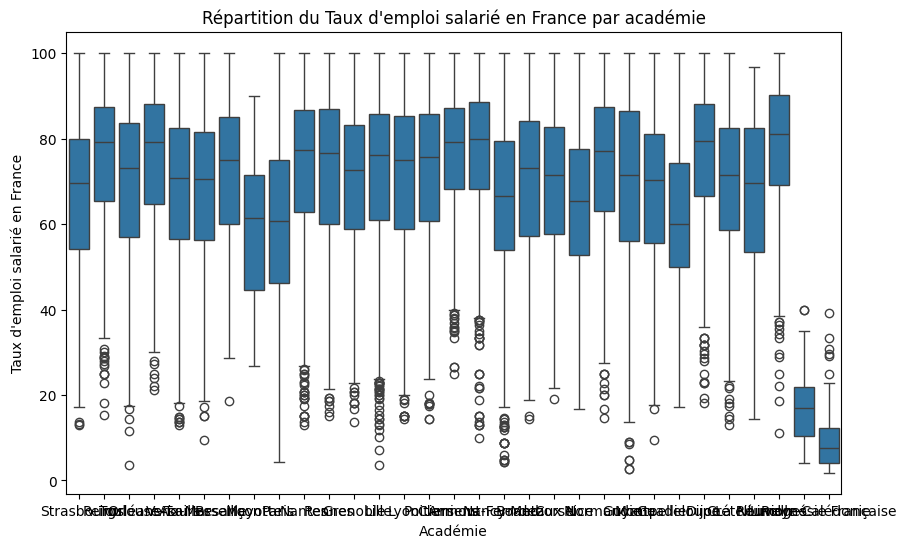

Moyenne et écart-type par académie 
                          mean        std
Académie                                 
Aix-Marseille        68.330476  16.870592
Amiens               76.392316  14.384787
Besançon             72.173950  16.353982
Bordeaux             70.166526  17.487291
Clermont-Ferrand     76.497814  16.393214
Corse                69.320488  17.349924
Créteil              69.949360  16.367927
Dijon                75.734726  16.125732
Grenoble             70.293569  17.035247
Guadeloupe           60.710320  17.147357
Guyane               68.207843  24.190440
La Réunion           66.844250  18.594704
Lille                72.216682  17.722713
Limoges              77.983386  15.643692
Lyon                 71.123065  17.713093
Mayotte              58.386364  16.667118
Montpellier          67.857470  16.922202
Nancy-Metz           65.323287  18.256016
Nantes               73.592131  17.253363
Nice                 65.197613  16.384648
Normandie            74.063432  16.68001

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouper par académie et calculer les statistiques descriptives
stats = df.groupby('Académie')["Taux d'emploi salarié en France"].describe()
print("Statistiques descriptives du taux d'emploi salarié en France:")
print(stats)

# Créer un box plot pour visualiser la répartition du Taux d'insertion par académie
plt.figure(figsize=(10, 6))
sns.boxplot(x='Académie', y="Taux d'emploi salarié en France", data=df)
plt.title("Répartition du Taux d'emploi salarié en France par académie")
plt.xlabel('Académie')
plt.ylabel("Taux d'emploi salarié en France")
plt.show()

# Calculer la moyenne et l'écart-type par académie
mean_std = df.groupby('Académie')["Taux d'emploi salarié en France"].agg(['mean', 'std'])
print(f"Moyenne et écart-type par académie ")
print(mean_std)


Statistiques descriptives du taux d'insertion par académie:
                      count       mean        std   min     25%    50%  \
Académie                                                                 
Aix-Marseille        1890.0  59.240794  22.640087   0.0  43.725  60.00   
Amiens                963.0  61.961890  22.891524   0.0  45.000  64.90   
Besançon              833.0  61.707923  22.823566   0.0  43.800  64.00   
Bordeaux             2372.0  56.085034  23.736582   0.0  37.875  55.20   
Clermont-Ferrand      915.0  59.308743  23.020613   0.0  40.000  60.70   
Corse                 205.0  54.926829  17.928931   0.0  41.700  55.60   
Créteil              2342.0  62.843894  21.405014   0.0  47.800  63.60   
Dijon                1005.0  63.180299  21.486385   3.8  47.600  65.00   
Grenoble             1866.0  62.805734  23.670541   0.0  44.400  64.25   
Guadeloupe            281.0  40.918505  19.766003   0.0  27.300  38.90   
Guyane                102.0  52.527451  23.674188   

ValueError: List of boxplot statistics and `positions` values must have same the length

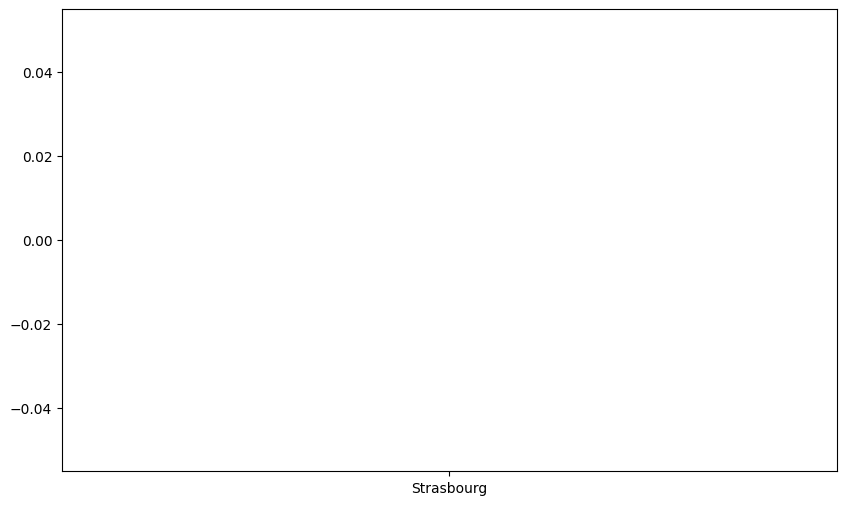

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouper par académie et calculer les statistiques descriptives
stats = df.groupby('Académie')["% d'emplois stables parmi les salariés en France"].describe()
print("Statistiques descriptives du taux d'insertion par académie:")
print(stats)

# Créer un box plot pour visualiser la répartition du Taux d'insertion par académie
plt.figure(figsize=(10, 6))
sns.boxplot(x='Académie', y="Taux d'insertion", data=df)
plt.title("Répartition du % d'emplois stables parmi les salariés en France")
plt.xlabel('Académie')
plt.ylabel("% d'emplois stables parmi les salariés en France")
plt.show()

# Calculer la moyenne et l'écart-type par académie
mean_std = df.groupby('Académie')["% d'emplois stables parmi les salariés en France"].agg(['mean', 'std'])
print(f"Moyenne et écart-type par académie ")
print(mean_std)


Statistiques descriptives du Taux d'emploi salarié en France par académie:
                      count       mean        std   min     25%    50%  \
Académie                                                                 
Aix-Marseille        1890.0  68.330476  16.870592   9.5  56.200  70.45   
Amiens                963.0  76.392316  14.384787  25.0  68.200  79.20   
Besançon              833.0  72.173950  16.353982  18.5  60.000  75.00   
Bordeaux             2372.0  70.166526  17.487291  14.3  57.325  73.10   
Clermont-Ferrand      915.0  76.497814  16.393214  10.0  68.200  80.00   
Corse                 205.0  69.320488  17.349924  19.0  57.700  71.40   
Créteil              2342.0  69.949360  16.367927  13.0  58.600  71.40   
Dijon                1005.0  75.734726  16.125732  18.2  66.700  79.40   
Grenoble             1866.0  70.293569  17.035247  13.6  58.900  72.70   
Guadeloupe            281.0  60.710320  17.147357  17.2  50.000  60.00   
Guyane                102.0  68.20784

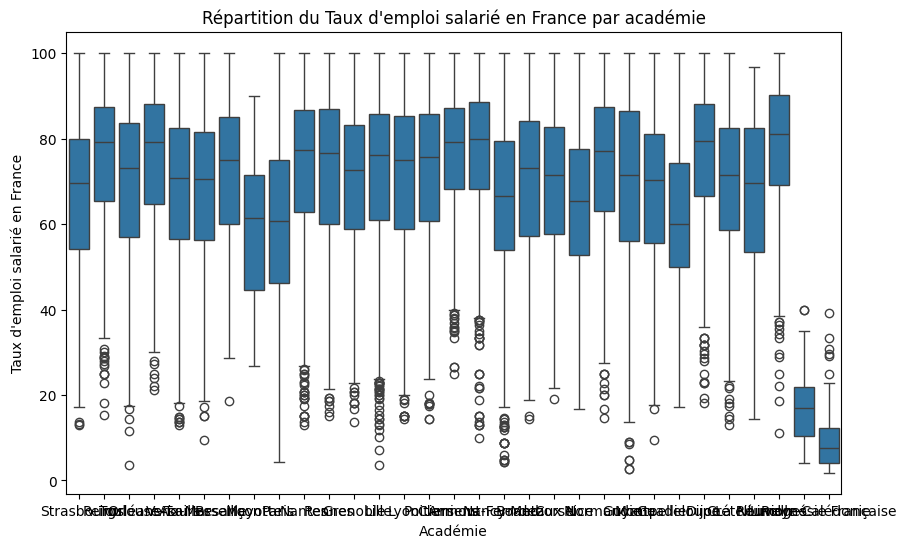

Moyenne et écart-type par académie 
                          mean        std
Académie                                 
Aix-Marseille        68.330476  16.870592
Amiens               76.392316  14.384787
Besançon             72.173950  16.353982
Bordeaux             70.166526  17.487291
Clermont-Ferrand     76.497814  16.393214
Corse                69.320488  17.349924
Créteil              69.949360  16.367927
Dijon                75.734726  16.125732
Grenoble             70.293569  17.035247
Guadeloupe           60.710320  17.147357
Guyane               68.207843  24.190440
La Réunion           66.844250  18.594704
Lille                72.216682  17.722713
Limoges              77.983386  15.643692
Lyon                 71.123065  17.713093
Mayotte              58.386364  16.667118
Montpellier          67.857470  16.922202
Nancy-Metz           65.323287  18.256016
Nantes               73.592131  17.253363
Nice                 65.197613  16.384648
Normandie            74.063432  16.68001

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouper par académie et calculer les statistiques descriptives
stats = df.groupby('Académie')["Taux d'emploi salarié en France"].describe()
print("Statistiques descriptives du Taux d'emploi salarié en France par académie:")
print(stats)

# Créer un box plot pour visualiser la répartition du Taux d'insertion par académie
plt.figure(figsize=(10, 6))
sns.boxplot(x='Académie', y="Taux d'emploi salarié en France", data=df)
plt.title("Répartition du Taux d'emploi salarié en France par académie")
plt.xlabel('Académie')
plt.ylabel("Taux d'emploi salarié en France")
plt.show()

# Calculer la moyenne et l'écart-type par académie
mean_std = df.groupby('Académie')["Taux d'emploi salarié en France"].agg(['mean', 'std'])
print(f"Moyenne et écart-type par académie ")
print(mean_std)


In [190]:
# Filtrer pour (Nombre de poursuivants + Nombre de sortants) > 0
filtre = (df['Nombre de poursuivants'] + df['Nombre de sortants']) > 0

# Compter les valeurs non nulles de 'Taux d\'emploi' dans les lignes qui satisfont la condition
nombre_valeurs_taux_emploi = df.loc[filtre, 'Taux d\'emploi'].count()
nombre_valeurs_taux_insertion = df.loc[filtre, 'Taux d\'insertion'].count()*

# Afficher le nombre de valeurs de Taux d'emploi
print(f"Nombre de valeurs de Taux d'emploi lorsque (Nombre de poursuivants + Nombre de sortants) > 0 : {nombre_valeurs_taux_emploi}")
print(f"Nombre de valeurs de Taux d'insertion lorsque (Nombre de poursuivants + Nombre de sortants) > 0 : {nombre_valeurs_taux_insertion}")

Nombre de valeurs de Taux d'emploi lorsque (Nombre de poursuivants + Nombre de sortants) > 0 : 0
Nombre de valeurs de Taux d'insertion lorsque (Nombre de poursuivants + Nombre de sortants) > 0 : 0


In [106]:
#en conséquence, dans la mesure où on projette d'étudier le dataset quand les sortants + pousruivants sont identifiés, on supprime les deux colonnes prédetnes identifiées
# Supprimer les colonnes vides (où toutes les valeurs sont NaN)
#df = df.dropna(axis=1, how='all')


In [191]:
df.shape

(47697, 17)

In [192]:
import pandas as pd

# Calculer le nombre de valeurs uniques dans la colonne 'Région'
nombre_valeurs_uniques_region = df["Taux d'insertion"].nunique()

# Afficher le résultat
print(f"Nombre de valeurs uniques dans la colonne 'Taux d'insertion' : {nombre_valeurs_uniques_region}")


Nombre de valeurs uniques dans la colonne 'Taux d'insertion' : 0


Moyenne et écart-type par région:
                                 mean        std
Région                                          
Auvergne-Rhône-Alpes        71.677716  17.432764
Bourgogne-Franche-Comté     74.120947  16.321736
Bretagne                    72.871542  17.596867
Centre-Val de Loire         75.585778  16.210806
Collectivités d'outre-mer   12.466146   8.226795
Corse                       69.320488  17.349924
Grand Est                   68.111432  17.979157
Guadeloupe                  60.710320  17.147357
Guyane                      68.207843  24.190440
Hauts-de-France             73.176839  17.102159
La Réunion                  66.844250  18.594704
Mayotte                     58.386364  16.667118
Normandie                   74.063432  16.680015
Nouvelle-Aquitaine          72.066437  17.227397
Occitanie                   68.920773  17.198128
Pays de la Loire            73.592131  17.253363
Provence-Alpes-Côte d'Azur  67.157597  16.756357
Île-de-France               65.7511

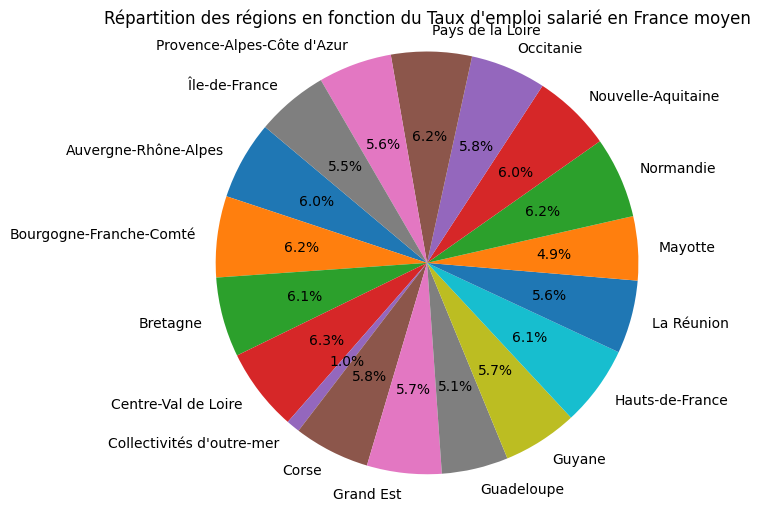

In [194]:

# Filtrer les lignes où "Taux d'insertion" n'est pas NaN
df_filtered = df.dropna(subset=["Taux d'emploi salarié en France"])

# Calculer la moyenne et l'écart-type par région
mean_std = df_filtered.groupby('Région')["Taux d'emploi salarié en France"].agg(['mean', 'std'])

# Identifier les régions avec des données insuffisantes (moyenne = NaN)
regions_with_nan = df['Région'][df['Région'].isin(mean_std[mean_std['mean'].isna()].index.unique())].unique()

# Supprimer les régions avec moyenne = NaN pour éviter de les inclure dans le graphique
mean_std = mean_std.dropna(subset=['mean'])

# Vérifier si le DataFrame mean_std n'est pas vide
if not mean_std.empty:
    # Afficher les statistiques
    print("Moyenne et écart-type par région:")
    print(mean_std)

    # Créer un pie chart basé sur les moyennes des régions
    plt.figure(figsize=(6, 6))
    plt.pie(mean_std['mean'], labels=mean_std.index, autopct='%1.1f%%', startangle=140)
    plt.title("Répartition des régions en fonction du Taux d'emploi salarié en France moyen")

    # Ajouter la mention des régions non incluses sous le titre
    if len(regions_with_nan) > 0:
        plt.subplots_adjust(bottom=0.2)  # Créer de l'espace en bas pour le texte
        plt.figtext(0.5, 0.02, f"Les régions suivantes ne sont pas mentionnées car leurs données ne permettent pas de les positionner : {', '.join(regions_with_nan)}", ha="center", fontsize=10, wrap=True)

    plt.axis('equal')  # Assure que le pie chart est dessiné comme un cercle.

    # Afficher le graphique
    plt.show()
else:
    print("Le DataFrame mean_std est vide, veuillez vérifier les données d'entrée.")


Moyenne et écart-type par académie:
                          mean        std
Académie                                 
Aix-Marseille        68.330476  16.870592
Amiens               76.392316  14.384787
Besançon             72.173950  16.353982
Bordeaux             70.166526  17.487291
Clermont-Ferrand     76.497814  16.393214
Corse                69.320488  17.349924
Créteil              69.949360  16.367927
Dijon                75.734726  16.125732
Grenoble             70.293569  17.035247
Guadeloupe           60.710320  17.147357
Guyane               68.207843  24.190440
La Réunion           66.844250  18.594704
Lille                72.216682  17.722713
Limoges              77.983386  15.643692
Lyon                 71.123065  17.713093
Mayotte              58.386364  16.667118
Montpellier          67.857470  16.922202
Nancy-Metz           65.323287  18.256016
Nantes               73.592131  17.253363
Nice                 65.197613  16.384648
Normandie            74.063432  16.68001

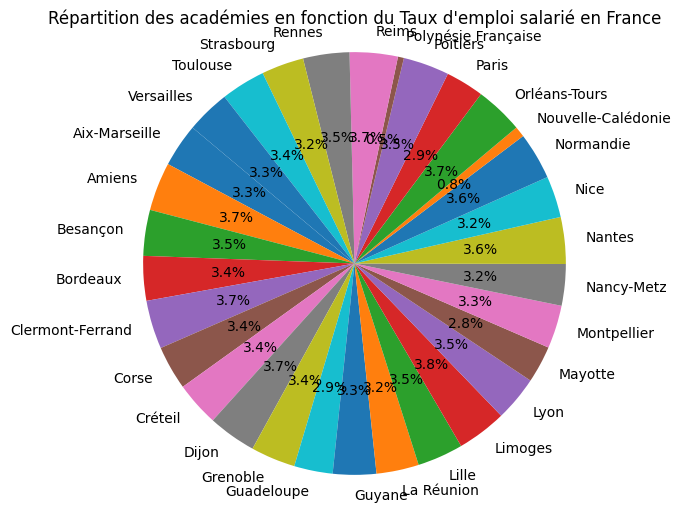

In [199]:

# Filtrer les lignes où "Taux d'emploi salarié en France" n'est pas NaN
df_filtered = df.dropna(subset=["Taux d'emploi salarié en France"])

# Calculer la moyenne et l'écart-type par académie
mean_std = df_filtered.groupby('Académie')["Taux d'emploi salarié en France"].agg(['mean', 'std'])

# Identifier les académies avec des données insuffisantes (moyenne = NaN)
academies_with_nan = df['Académie'][df['Académie'].isin(mean_std[mean_std['mean'].isna()].index.unique())].unique()

# Supprimer les académies avec moyenne = NaN pour éviter de les inclure dans le graphique
mean_std = mean_std.dropna(subset=['mean'])

# Vérifier si le DataFrame mean_std n'est pas vide
if not mean_std.empty:
    # Afficher les statistiques
    print("Moyenne et écart-type par académie:")
    print(mean_std)

    # Créer un pie chart basé sur les moyennes des académies
    plt.figure(figsize=(6, 6))
    plt.pie(mean_std['mean'], labels=mean_std.index, autopct='%1.1f%%', startangle=140)
    plt.title("Répartition des académies en fonction du Taux d'emploi salarié en France")

    # Ajouter la mention des académies non incluses sous le titre
    if len(academies_with_nan) > 0:
        plt.subplots_adjust(bottom=0.2)  # Créer de l'espace en bas pour le texte
        plt.figtext(0.5, 0.02, f"Les académies suivantes ne sont pas mentionnées car leurs données ne permettent pas de les positionner : {', '.join(academies_with_nan)}", ha="center", fontsize=10, wrap=True)

    plt.axis('equal')  # Assure que le pie chart est dessiné comme un cercle.

    # Afficher le graphique
    plt.show()
else:
    print("Le DataFrame mean_std est vide, veuillez vérifier les données d'entrée.")


Top 10 académies par moyenne du Taux d'emploi salarié en France:
                       mean        std
Académie                              
Limoges           77.983386  15.643692
Clermont-Ferrand  76.497814  16.393214
Amiens            76.392316  14.384787
Reims             75.737724  15.977600
Dijon             75.734726  16.125732
Orléans-Tours     75.585778  16.210806
Normandie         74.063432  16.680015
Nantes            73.592131  17.253363
Rennes            72.871542  17.596867
Poitiers          72.558748  16.854043


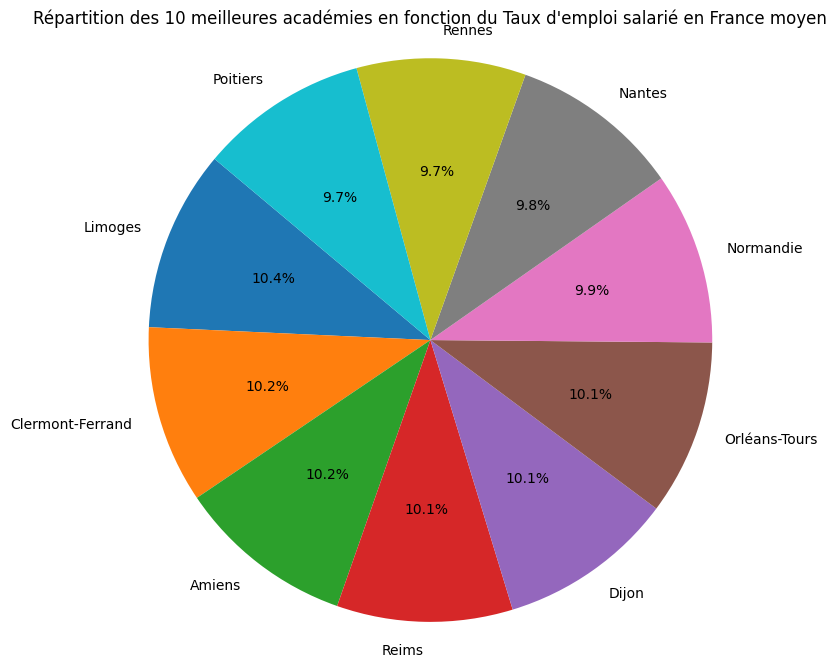

le Taux d'emploi salarié en France moyen se définit comme 70 %


In [204]:
#affiner par un effet loupe en n'affichant que les 10 meilleures académies :

# Filtrer pour exclure l'académie de "Mayotte"
df_filtered = df[df['Académie'] != 'Mayotte']

# Calculer la moyenne et l'écart-type par académie pour les académies restantes
mean_std = df_filtered.groupby('Académie')["Taux d'emploi salarié en France"].agg(['mean', 'std'])

# Trier par la moyenne dans l'ordre décroissant et sélectionner les 10 premières académies
top_10_academies = mean_std.sort_values(by='mean', ascending=False).head(10)

# Vérifier si le DataFrame top_10_academies n'est pas vide
if not top_10_academies.empty:
    # Afficher les statistiques
    print("Top 10 académies par moyenne du Taux d'emploi salarié en France:")
    print(top_10_academies)

    # Créer un pie chart basé sur les moyennes des académies
    plt.figure(figsize=(8, 8))
    plt.pie(top_10_academies['mean'], labels=top_10_academies.index, autopct='%1.1f%%', startangle=140)
    plt.title("Répartition des 10 meilleures académies en fonction du Taux d'emploi salarié en France moyen")
    plt.axis('equal')  # Assure que le pie chart est dessiné comme un cercle.

    # Afficher le graphique
    plt.show()
else:
    print("Le DataFrame top_10_academies est vide, veuillez vérifier les données d'entrée.")
print(f"le Taux d'emploi salarié en France moyen se définit comme {round(df["Taux d'emploi salarié en France"].mean())} %")

Top 10 académies par moyenne du Taux d'emploi salarié en France:
                       mean        std
Académie                              
Limoges           77.983386  15.643692
Clermont-Ferrand  76.497814  16.393214
Amiens            76.392316  14.384787
Reims             75.737724  15.977600
Dijon             75.734726  16.125732
Orléans-Tours     75.585778  16.210806
Normandie         74.063432  16.680015
Nantes            73.592131  17.253363
Rennes            72.871542  17.596867
Poitiers          72.558748  16.854043


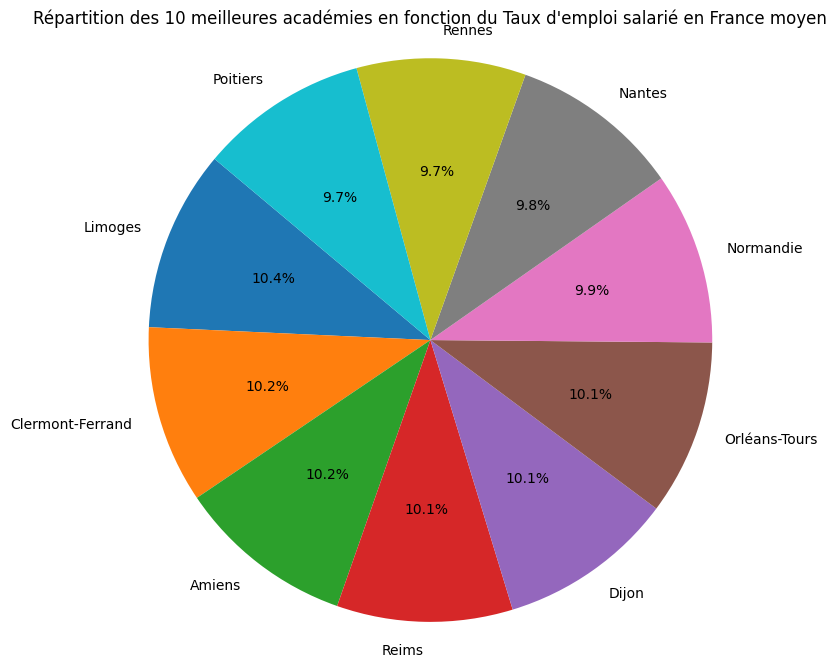

Le taux d'insertion moyen se définit comme 70.09


In [206]:
# Filtrer pour exclure l'académie de "Mayotte"
df_filtered = df[df['Académie'] != 'Mayotte']

# Retirer les lignes où "Taux d'emploi salarié en France" est NaN
df_filtered = df_filtered.dropna(subset=["Taux d'emploi salarié en France"])

# Calculer la moyenne et l'écart-type par académie pour les académies restantes
mean_std = df_filtered.groupby('Académie')["Taux d'emploi salarié en France"].agg(['mean', 'std'])

# Trier par la moyenne dans l'ordre décroissant et sélectionner les 10 premières académies
top_10_academies = mean_std.sort_values(by='mean', ascending=False).head(10)

# Vérifier si le DataFrame top_10_academies n'est pas vide
if not top_10_academies.empty:
    # Afficher les statistiques
    print("Top 10 académies par moyenne du Taux d'emploi salarié en France:")
    print(top_10_academies)

    # Créer un pie chart basé sur les moyennes des académies
    plt.figure(figsize=(8, 8))
    plt.pie(top_10_academies['mean'], labels=top_10_academies.index, autopct='%1.1f%%', startangle=140)
    plt.title("Répartition des 10 meilleures académies en fonction du Taux d'emploi salarié en France moyen")
    plt.axis('equal')  # Assure que le pie chart est dessiné comme un cercle.

    # Afficher le graphique
    plt.show()
else:
    print("Le DataFrame top_10_academies est vide, veuillez vérifier les données d'entrée.")

# Correction du problème de NaN pour le calcul de la moyenne
mean_insertion_rate = round(df["Taux d'emploi salarié en France"].mean(skipna=True), 2)
print(f"Le taux d'insertion moyen se définit comme {mean_insertion_rate}")


In [ ]:

# Grouper par académie et calculer les statistiques descriptives
stats = df.groupby('Académie')["Taux d'insertion"].describe()
print("Statistiques descriptives par académie:")
print(stats)

# Créer un box plot pour visualiser la répartition du Taux d'insertion par académie
plt.figure(figsize=(10, 6))
sns.boxplot(x='Académie', y="Taux d'insertion", data=df)
plt.title("Répartition du Taux d'insertion par académie")
plt.xlabel('Académie')
plt.ylabel('Taux d\'insertion')
plt.show()

# Calculer la moyenne et l'écart-type par académie
mean_std = df.groupby('Académie')["Taux d'insertion"].agg(['mean', 'std'])
print("Moyenne et écart-type par académie:")
print(mean_std)


In [ ]:

# Trier le dataframe par 'Taux d\'insertion' en ordre décroissant
df_sorted = df.sort_values(by='Taux d\'insertion', ascending=False)

# Sélectionner les 10 premières académies
top_10 = df_sorted.head(10)

# Afficher le dataframe trié
#print(top_10)

# Créer un histogramme des 10 meilleures académies
plt.figure(figsize=(12, 6))
plt.bar(top_10['Académie'], top_10['Taux d\'insertion'], color='green')
plt.xlabel('Académie')
plt.ylabel("Taux d'insertion (%)")
plt.title("Top 10 des académies par taux d'insertion")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Appliquer la transformation à la colonne 'Libellé du diplôme'
df['Libellé du diplôme'] = df['Libellé du diplôme'].str.strip().str.capitalize()

# Afficher le DataFrame pour vérifier les modifications
print(df)

In [ ]:
# Exemple de création de dataframe
# Trier le dataframe par 'Taux d'insertion' en ordre décroissant
df_sorted = df.sort_values(by="Taux d'insertion", ascending=False)

# Afficher le dataframe trié
print(df_sorted)

# Créer un histogramme des meilleures académies
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Académie'], df_sorted["Taux d'insertion"], color='green')
plt.xlabel('Académie')
plt.ylabel("Taux d'insertion (%)")
plt.title("Meilleures académies par taux d'insertion")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Meilleure visualisation avec axe des ordonnées ajusté
import numpy as np
import matplotlib.pyplot as plt

# Trier le dataframe par 'Taux d'insertion' en ordre décroissant
df_sorted = df.sort_values(by="Taux d'insertion", ascending=False)

# Calculer la moyenne des taux d'insertion
mean_insertion_rate = df_sorted["Taux d'insertion"].mean()

# Calculer les écarts par rapport à la moyenne
df_sorted['Ecart à la moyenne'] = df_sorted["Taux d'insertion"] - mean_insertion_rate

# Créer un histogramme des meilleures académies avec une ligne pour la moyenne
plt.figure(figsize=(12, 8))
bars = plt.bar(df_sorted['Académie'], df_sorted["Taux d'insertion"], color='skyblue')

# Ajouter une ligne horizontale représentant la moyenne
plt.axhline(y=mean_insertion_rate, color='r', linestyle='--', label='Moyenne')

# Mettre en évidence les académies avec un taux d'insertion significativement supérieur à la moyenne
for bar, ecart in zip(bars, df_sorted['Ecart à la moyenne']):
    if ecart > 0:
        bar.set_color('green')
    elif ecart < 0:
        bar.set_color('red')

# Ajuster les limites de l'axe des ordonnées

plt.ylim([80, None])

# Ajuster les labels et le titre
plt.xlabel('Académie')
plt.ylabel("Taux d'insertion (%)")
plt.title("Meilleures académies par taux d'insertion avec écarts par rapport à la moyenne")
plt.xticks(rotation=45, ha='right')
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Trier le dataframe par 'Taux d'insertion' en ordre décroissant
df_sorted = df.sort_values(by="Taux d'insertion", ascending=False)

# Afficher le dataframe trié
print(df_sorted)

# Créer un histogramme des meilleures académies avec annotations
plt.figure(figsize=(12, 8))
bars = plt.bar(df_sorted['Académie'], df_sorted["Taux d'insertion"], color='skyblue')

# Ajouter des annotations pour montrer les écarts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 1), ha='center', va='bottom')

plt.xlabel('Académie', fontsize=12)
plt.ylabel("Taux d'insertion (%)", fontsize=12) 
plt.title("Meilleures académies par taux d'insertion", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, df_sorted["Taux d'insertion"].max() + 5)  # Ajuster les limites de l'axe y pour mieux voir les écarts
plt.grid(axis='y', linestyle='--', alpha=0.7)   

# Afficher le graphique
plt.tight_layout()
plt.show()


In [99]:
# Filtrer les lignes où "Source de données" est "IP"
#df_ip = df.loc[df['Source de données'] == 'IP']
# Calcul du nombre de valeurs distinctes pour chaque colonne
#distinct_counts = df_ip.nunique()

#print(distinct_counts)
#df_ip.head()
#df_ip.info()

In [ ]:
#contrôle du nettoyage

# Sauvegarder le DataFrame dans un fichier CSV
df.to_csv('esr_intersup_nettoye 2024_09.csv', index=False)
print("Le dataset nettoyé a été sauvegardé dans le fichier 'esr_intersup_nettoye_2024_09.csv'.")


In [ ]:
# Compter le nombre de valeurs distinctes pour chaque colonne
valeurs_distinctes_par_colonne = df.nunique()

# Afficher les résultats
print("Nombre de valeurs distinctes par colonne :")
print(valeurs_distinctes_par_colonne)

In [102]:
	#Taux d'emploi salarié en France	Taux d'insertion	Taux d'emploi

In [ ]:
## LIEN API SUR L'AUTRE JEU DE DONNEES /  https://data.enseignementsup-recherche.gouv.fr/api/explore/v2.1/catalog/datasets/fr-esr-insertion_professionnelle-master/records?limit=20 

In [207]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger le fichier GeoJSON
regions = gpd.read_file('https://france-geojson.gregoiredavid.fr/repo/regions.geojson')

# Définir la taille de la figure
plt.figure(figsize=(15, 15))

# Définir une couleur par défaut pour toutes les régions
base_color = '#cccccc'  # Gris clair

# Afficher toutes les régions avec la couleur par défaut
regions.plot(color=base_color)

# Définir la région spécifique à colorier
region_name = "Île-de-France"  # Remplacez par le nom de la région désirée
specific_color = '#00FF00'  # Vert

# Filtrer et afficher la région spécifique avec une autre couleur
regions[regions['nom'] == region_name].plot(color=specific_color)

plt.show()


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
%pip install contextily

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# Retirer les lignes avec des valeurs manquantes dans les colonnes 'Région' ou "Taux d'insertion"
df1 = df.dropna(subset=['Région', "% d'emplois stables parmi les salariés en France"])

# Identifier la discipline avec le plus grand taux d'insertion pour chaque région
top_disciplines = df1.loc[df1.groupby('Région')["% d'emplois stables parmi les salariés en France"].idxmax()]

# Charger les données GeoJSON des régions françaises
url = 'https://france-geojson.gregoiredavid.fr/repo/regions.geojson'
regions_geo = gpd.read_file(url)

# Assurer que les noms de région dans les données géographiques et le dataframe correspondent
regions_geo['nom'] = regions_geo['nom'].str.strip()
top_disciplines['Région'] = top_disciplines['Région'].str.strip()

# Joindre les données des disciplines au GeoDataFrame
try:
    regions_geo = regions_geo.merge(top_disciplines, left_on='nom', right_on='Région')
except KeyError as e:
    print(f"KeyError: {e} - Ignoring missing entries.")

# Reprojeter le GeoDataFrame sur le système de coordonnées EPSG:3857 pour correspondre à la carte en tuiles web
regions_geo = regions_geo.to_crs(epsg=3857)

# Créer une carte
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
regions_geo.plot(column="% d'emplois stables parmi les salariés en France", cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Ajouter un fond de carte OpenStreetMap à partir de contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Annoter chaque région avec la discipline ayant le plus grand taux d'insertion
for idx, row in regions_geo.iterrows():
    plt.annotate(text=row['Discipline'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

# Ajouter un titre et des légendes pour les axes
ax.set_title("Discipline avec le plus grand % d'emplois stables parmi les salariés en France")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Afficher la carte
plt.show()


In [ ]:
### mon texte brut entre guillemets
st.text("Hi,\nPeople\t!!!!!!!!!")
st.text('Welcome to')
st.text(""" Streamlit's World""")

In [ ]:
st.title("Présentation synthétiques des débouchés Master LMD, MEEF et licences professionnelles sur la période \n 2019 - 2021", anchor="Apress")
st.header("""septembre 2024 - Sybille Dethoor-Loth""") ### l'entête pout repréenter un sensemble de contenus
st.text("ceci est un texte simple") 
st.subheader("""présentation générale synthèse du territoire""") ### le sous entête pout repréenter un sensemble de contenus
st.caption("""Ceci est ma légende""") ### légende : explication qui décrit des notes, des notes de bas de page, des tableaux, des images et des vidéos.


In [ ]:
st.subheader('Lire et afficher des données CSV')
file = st.file_uploader("Téléchargez un fichier CSV", type="csv")
if file is not None:
    df_csv = pd.read_csv(file)
    st.dataframe(df_csv)

In [ ]:
# Afficher une variable
nombre = 123
st.write("Afficher une variable numérique:", nombre)

# Afficher la date et l'heure actuelle
st.write("consultation aux Date et heure actuelles:", datetime.datetime.now())

In [ ]:
### mon texte formaté en latex pour la documentation technique

st.latex(r'''cos2\theta = 1 - 2sin^2\theta''')
st.latex("""(a+b)^2 = a^2 + b^2 + 2ab""")
st.latex(r'''\frac{\partial u}{\partial t}
   = h^2 \left( \frac{\partial^2 u}{\partial x^2}
      + \frac{\partial^2 u}{\partial y^2}
      + \frac{\partial^2 u}{\partial z^2} \right)''')

In [ ]:
### mon texte formaté
st.markdown("# Hi,\n# ***People*** \t!!!!!!!!!")
st.markdown('## Welcome to')
st.markdown("""### Streamlit's World""")

In [ ]:
### ici le code : La bibliothèque Streamlit offre une certaine flexibilité pour afficher le code de différents langages de programmation. 
### Le texte est mis en surbrillance comme indiqué dans un éditeur de code.
# Python Code
st.subheader("""Python Code""")
code = '''def hello():
     print("Hello, Streamlit!")'''
st.code(code, language='python')

# Java Code
st.subheader("""Java Code""")
st.code("""public class GFG {
    public static void main(String args[])
    {
        System.out.println("Hello World");
    }
}""", language='javascript')
st.subheader("""JavaScript Code""")
st.code(""" <p id="demo"><p>
<script>
try {
  adddlert("Welcome guest!");
}
catch(err) {
  document.getElementById("demo").innerHTML = err.message;
}
</script>
""")